In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_city_day = pd.read_csv('city_day_transformed.csv')
# df_city_hour = pd.read_csv('city_hour_transformed.csv')
# df_city_hour = pd.read_csv('city_hour_transformed.csv')
# df_station_hour = pd.read_csv('station_hour_transformed.csv')
# df_stations = pd.read_csv('stations_transformed.csv')

In [3]:
df_station_day = pd.read_csv('station_day_transformed.csv')

In [4]:
print('Below is a list of columns of tables just as they are loaded:')
print('~~~')
print(f'df_stations: {list(df_stations.columns)}')
print('~~~')
print(f'df_station_day: {list(df_station_day.columns)}')
print('~~~')
print(f'df_station_hour: {list(df_station_hour.columns)}')
print('~~~')
print(f'df_city_day: {list(df_city_day.columns)}')
print('~~~')
print(f'df_city_hour: {list(df_city_hour.columns)}')
print('~~~')

Below is a list of columns of tables just as they are loaded:
~~~
df_stations: ['Unnamed: 0', 'StationId', 'StationName', 'City', 'State', 'Status', 'Region']
~~~
df_station_day: ['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'StationName', 'City', 'State', 'Status', 'Region', 'Month', 'Year', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday', 'AQ_Acceptability']
~~~
df_station_hour: ['Unnamed: 0', 'StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'StationName', 'City', 'State', 'Status', 'Region', 'Day_period', 'Month', 'Year', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday', 'AQ_Acceptability']
~~~
df_city_day: ['Unnamed: 0', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'StationId', 'Statio

In [5]:
fields_to_show = ['City','AQI_Bucket']

In [6]:
fields_to_ignore = ['StationId', 'StationName', 'State', 'Status', 'Region', 'Month', 'Year', 'Season', 'City', 'Date', 'AQI', 'AQI_Bucket']
names_of_pollutants = list(set(df_city_day.columns) - set(fields_to_ignore))
print(f"Names of Pollutants: {list(names_of_pollutants)}")

Names of Pollutants: ['NOx', 'NO2', 'NH3', 'CO', 'PM2.5', 'NO', 'O3', 'Weekday_or_weekend', 'SO2', 'Unnamed: 0', 'Toluene', 'Regular_day_or_holiday', 'PM10', 'Xylene', 'Benzene', 'AQ_Acceptability']


In [29]:
import matplotlib

In [30]:
def plot_chart(dataframe, width=20.0, height=7.0, 
               title='<No title assigned>', xlabel_title='<No xlabel title assigned>', 
               ylabel_title='<No xlabel title assigned>', stacked=False):
    plt.rcParams['figure.figsize'] = [width, height]
    font = {'size': 16}
    matplotlib.rc('font', **font)
    ax = dataframe.plot(kind='barh', stacked=stacked, title=title)
    ax.set_ylabel(ylabel_title)
    ax.set_xlabel(xlabel_title)

In [9]:
def plot_sns_chart(dataframe, y_axis, class_separator=None, width=20.0, height=9.0, 
                   font_scale=2, xlabel_title="Xlabel title not set", ylabel_title="Ylabel title not set"):
    plt.rcParams['figure.figsize'] = [width, height]
    sns.set(font_scale=font_scale)
    g = sns.countplot(y=y_axis, hue=class_separator, data=dataframe)
    g.set(xlabel=xlabel_title, ylabel=ylabel_title)

In [10]:
def calculate_percentage(dataframe: pd.DataFrame):
    column_names = list(dataframe.columns)
    new_dataframe = dataframe.copy()
    total_values = {}
    valid_values_count = {}
    for index, each_row in new_dataframe.iterrows():
        total_values[index] = 0
        valid_values_count[index] = 0
        for each_column in column_names:
            if (not np.isnan(each_row[each_column])) and (each_row[each_column] > 0.0):
                total_values[index] = total_values[index] + each_row[each_column]
                valid_values_count[index] = valid_values_count[index] + 1

    for index, each_row in new_dataframe.iterrows():
        for target_column in column_names:
            if np.isnan(each_row[target_column]) or (each_row[target_column] == 0.0):
                each_row[target_column] = 0
            else:
                each_row[target_column] = each_row[target_column] / total_values[index] if total_values[index] > 0 else 0
            each_row[target_column] = each_row[target_column] * 100

    return new_dataframe

In [11]:
df_station_hour['AQI_Bucket'] = df_station_hour['AQI_Bucket'].fillna('Unknown')
df_city_hour['AQI_Bucket']    = df_city_hour['AQI_Bucket'].fillna('Unknown')
df_station_day['AQI_Bucket']  = df_station_day['AQI_Bucket'].fillna('Unknown')
df_city_day['AQI_Bucket']     = df_city_day['AQI_Bucket'].fillna('Unknown')

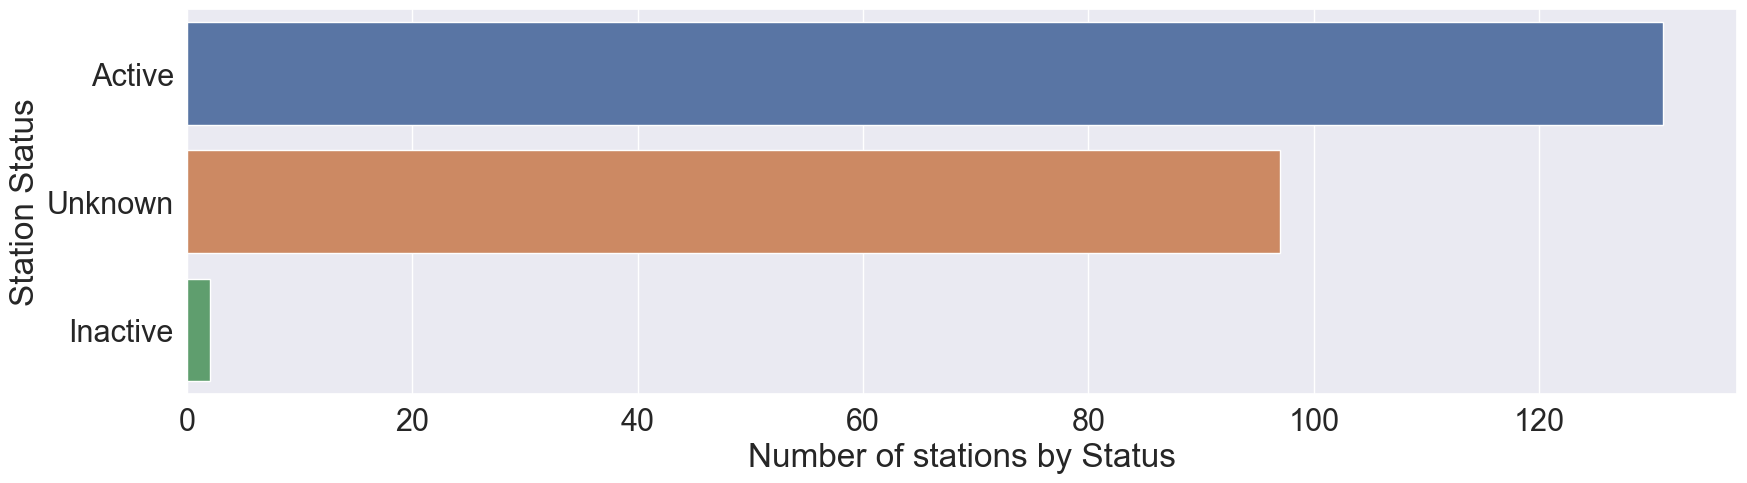

In [12]:
plot_sns_chart(df_stations, 'Status', 
               xlabel_title="Number of stations by Status",
               ylabel_title="Station Status", height=5.0)

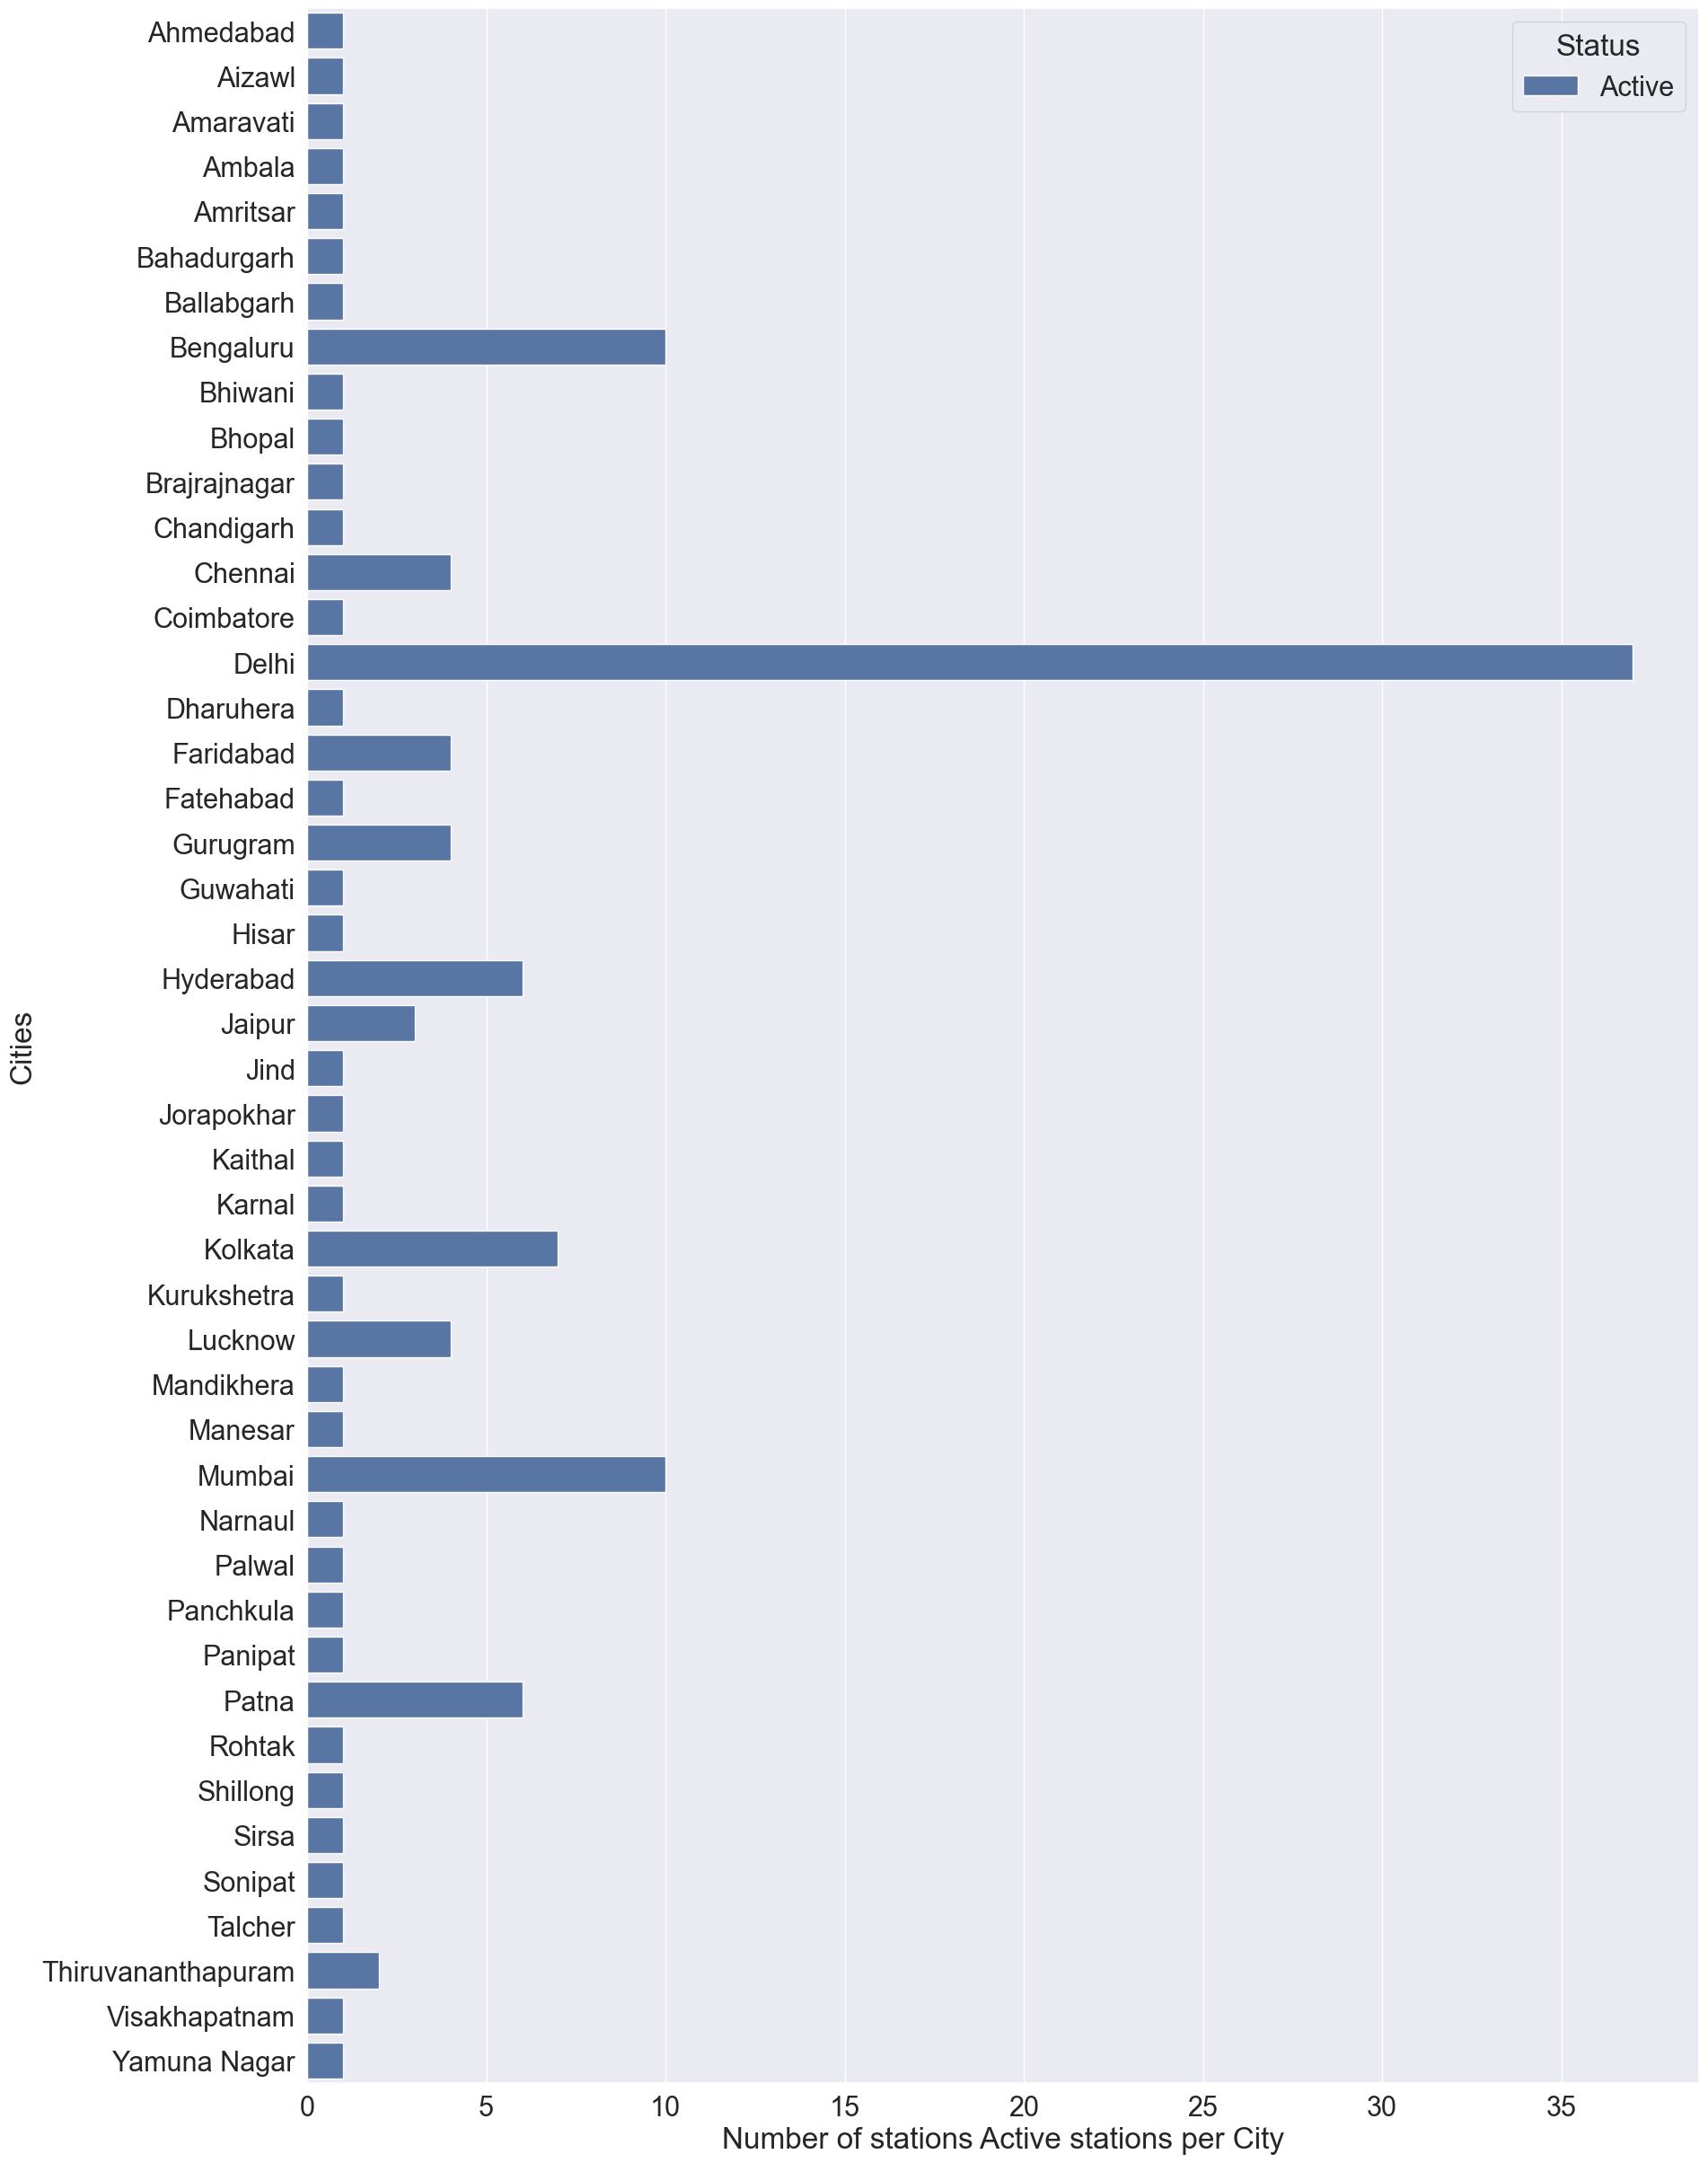

In [13]:
active_stations_filter = df_stations['Status'] == 'Active'
plot_sns_chart(df_stations[active_stations_filter].sort_values(by='City'), 'City', 'Status', 
               xlabel_title="Number of stations Active stations per City", ylabel_title = "Cities",
               height=30.0, font_scale=2)

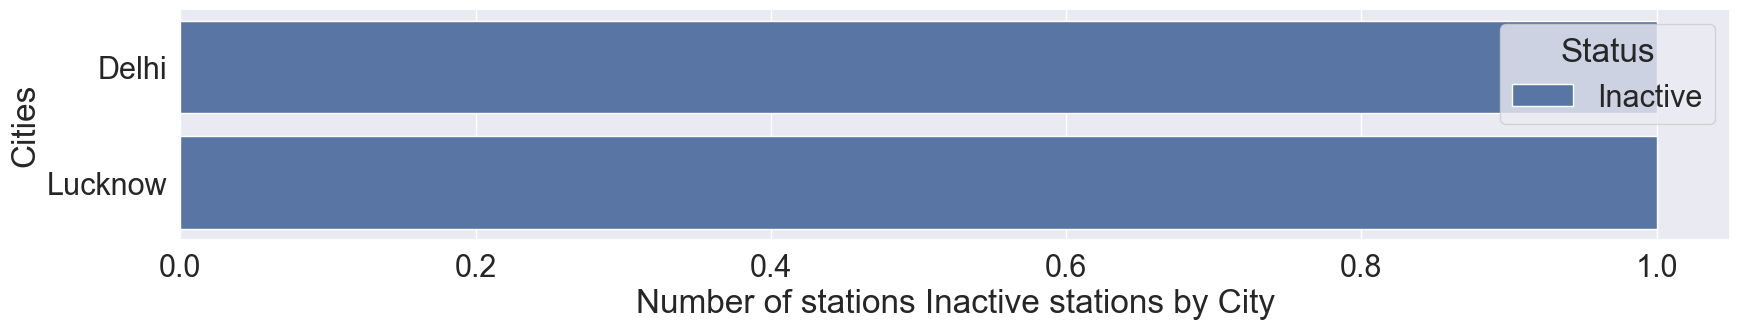

In [14]:
active_stations_filter = df_stations['Status'] == 'Inactive'
plot_sns_chart(df_stations[active_stations_filter].sort_values(by='City'), 'City', 'Status', 
               xlabel_title="Number of stations Inactive stations by City", ylabel_title = "Cities",
               height=3, font_scale=2)

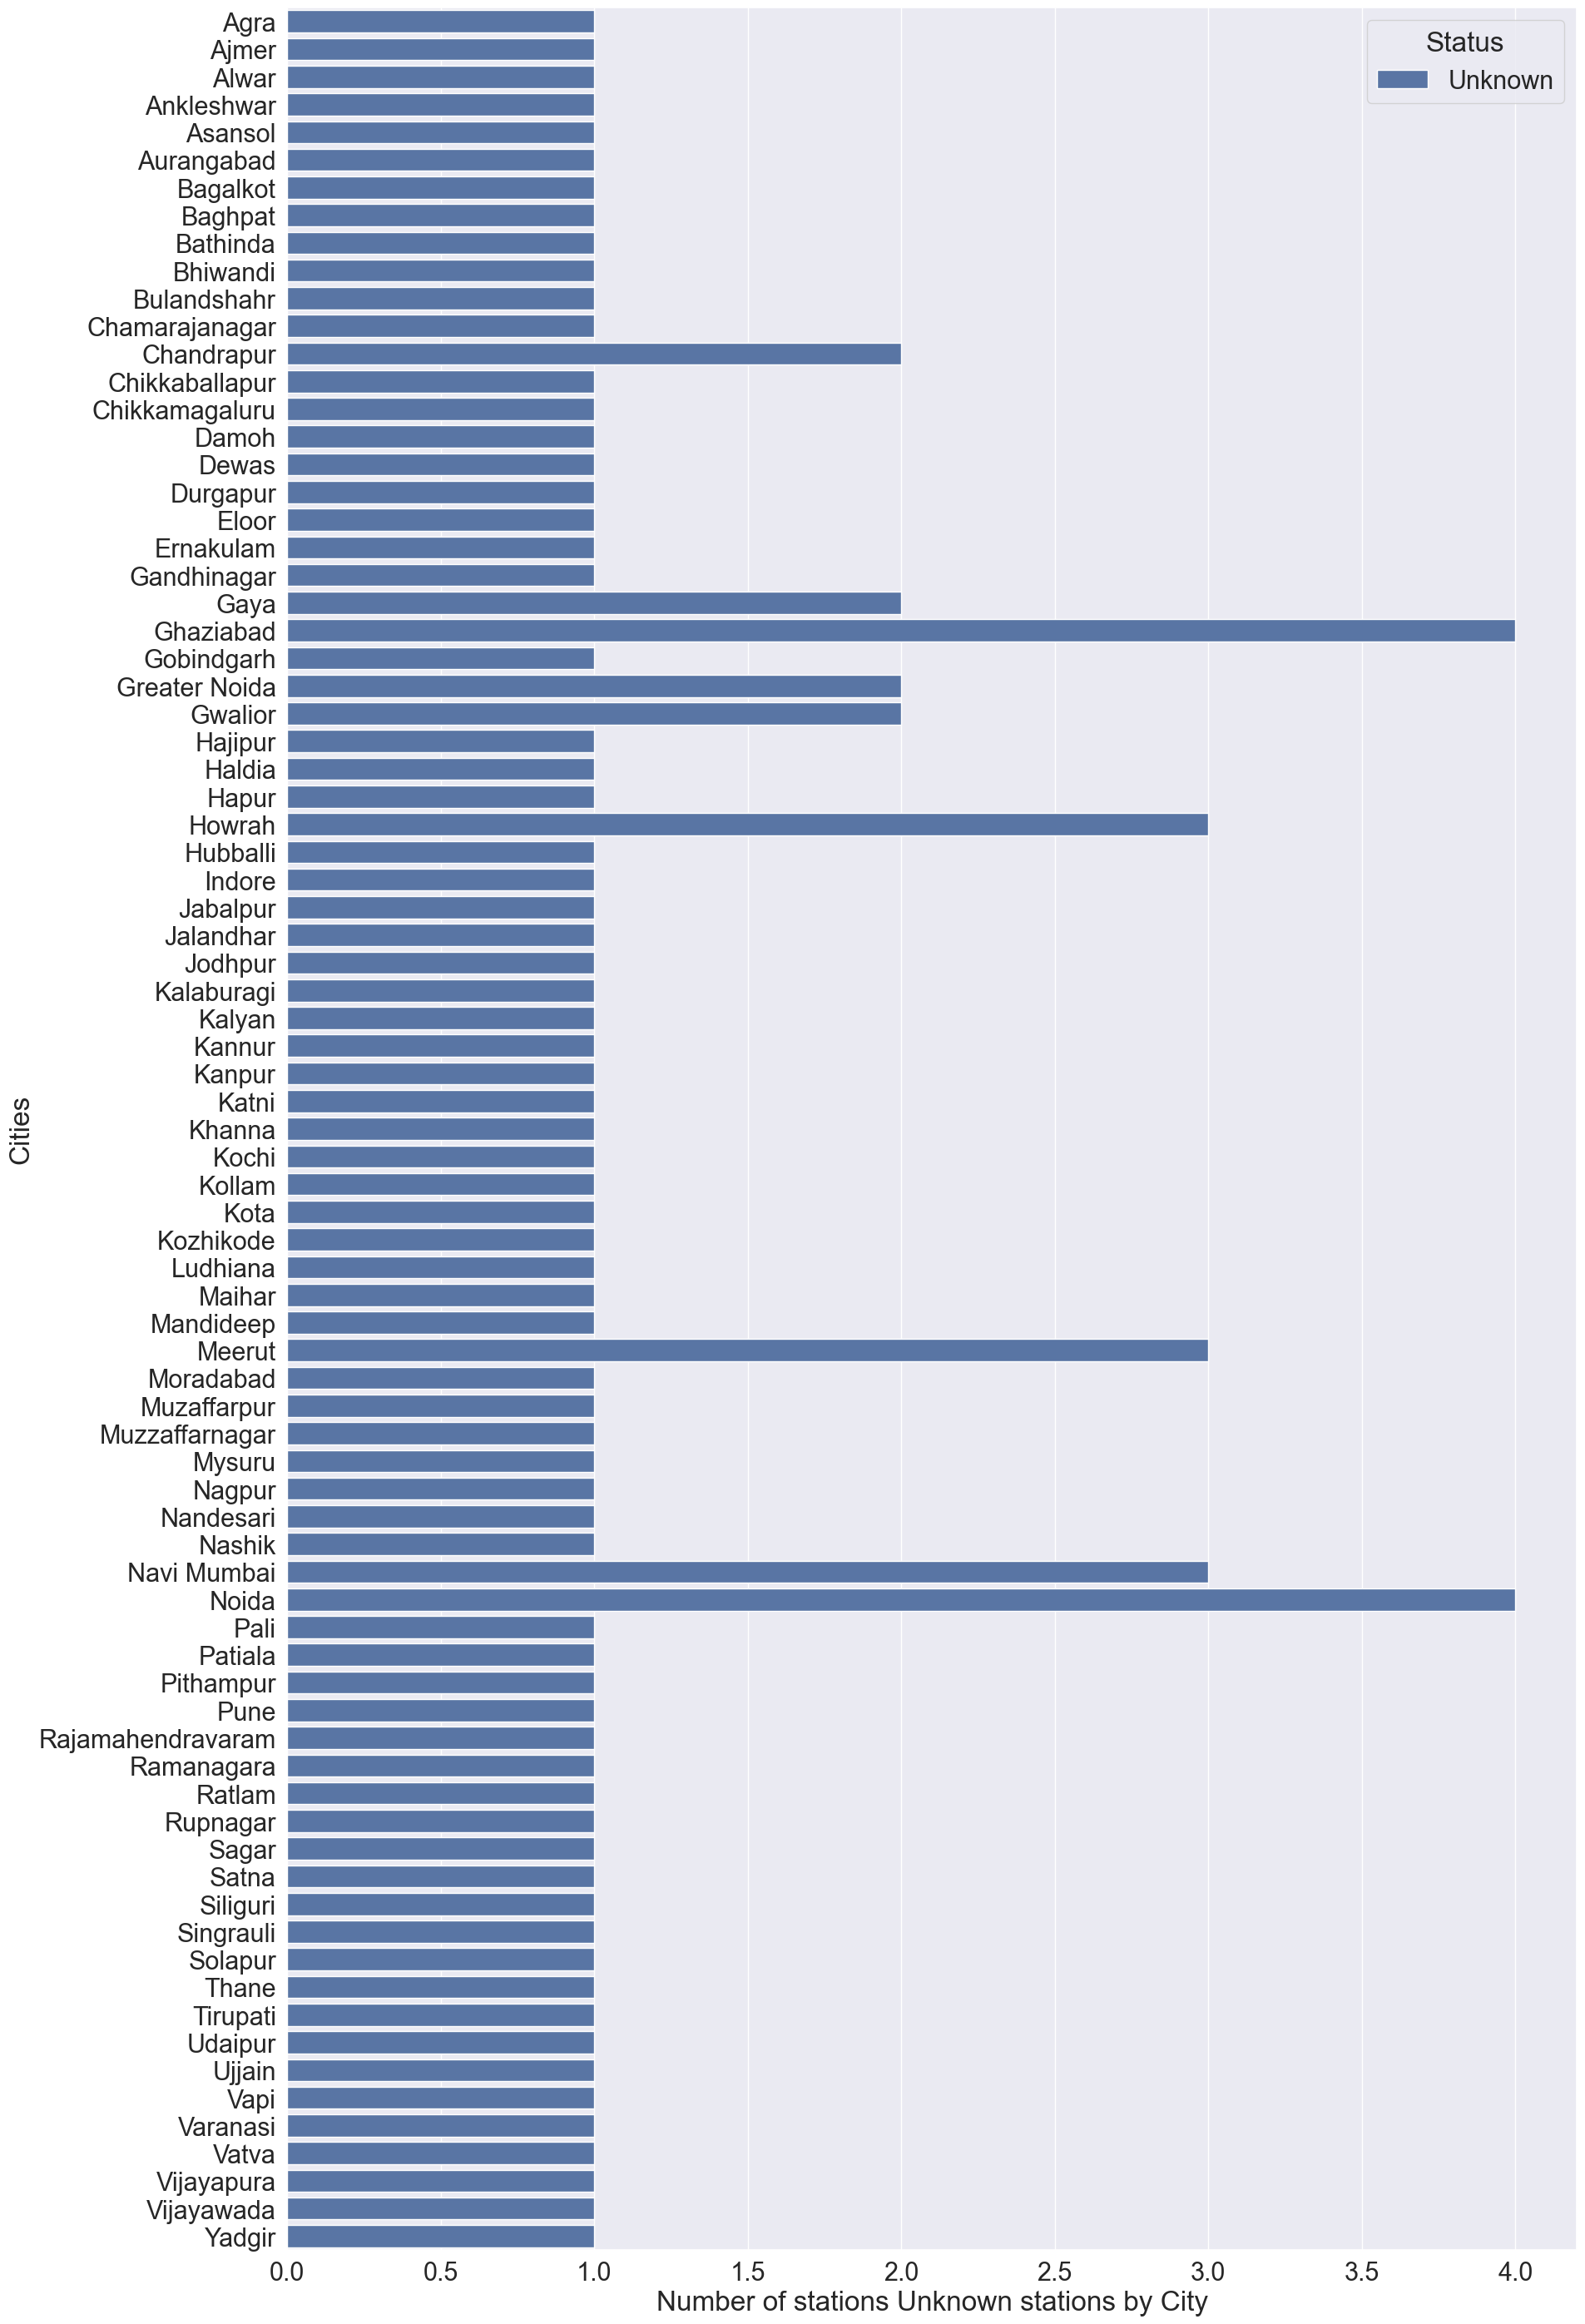

In [15]:
active_stations_filter = df_stations['Status'] == 'Unknown'
plot_sns_chart(df_stations[active_stations_filter].sort_values(by='City'), 'City', 'Status', 
               xlabel_title="Number of stations Unknown stations by City", ylabel_title = "Cities",
               height=35.0, font_scale=2)

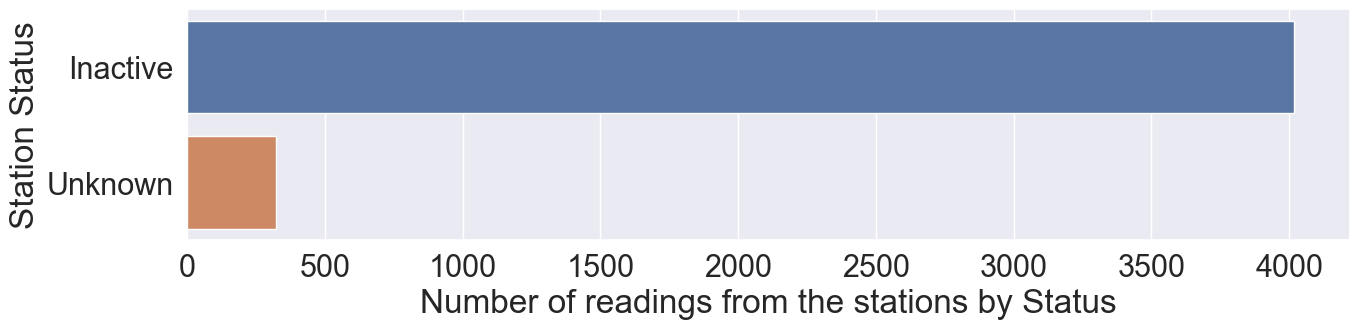

In [16]:
filter_not_active = df_city_day['Status'] != 'Active'
plot_sns_chart(df_city_day[filter_not_active], 'Status', 
               xlabel_title="Number of readings from the stations by Status", ylabel_title = "Station Status",
               width=15.0, height=3.0)

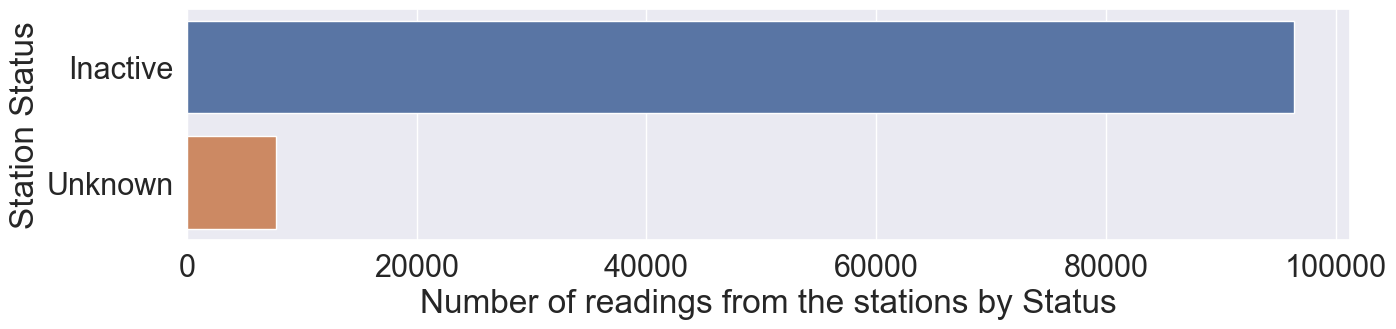

In [17]:
filter_not_active = df_city_hour['Status'] != 'Active'
plot_sns_chart(df_city_hour[filter_not_active], 'Status',
               xlabel_title="Number of readings from the stations by Status", ylabel_title = "Station Status",
               width=15.0, height=3.0)

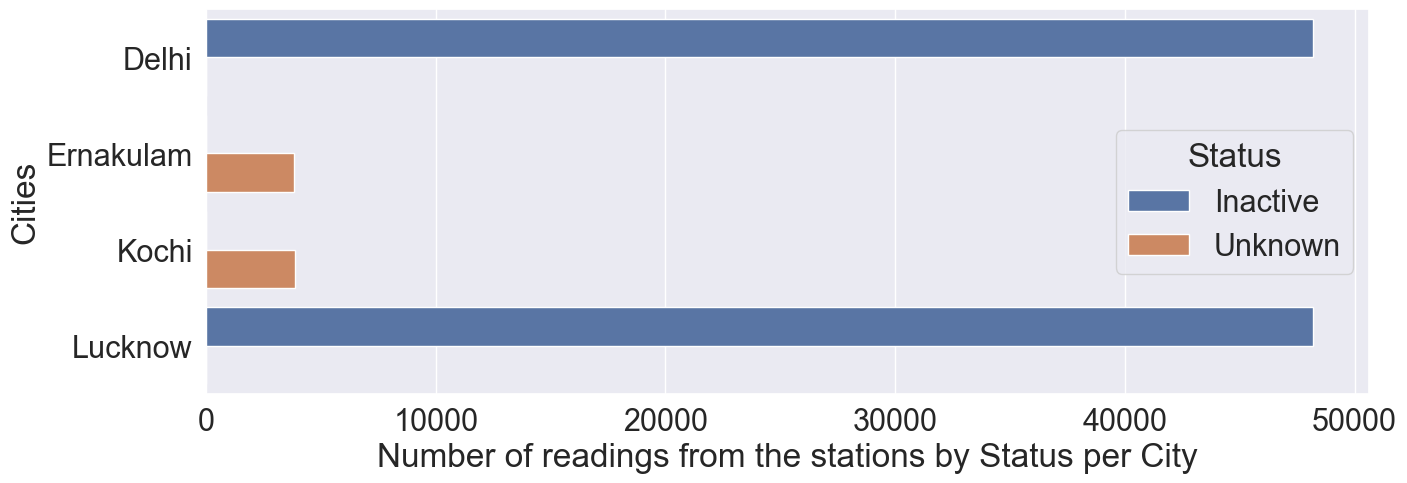

In [18]:
plot_sns_chart(df_city_hour[filter_not_active].sort_values(by='City'), 'City', 'Status',
               xlabel_title="Number of readings from the stations by Status per City", ylabel_title = "Cities",
               width=15.0, height=5.0)

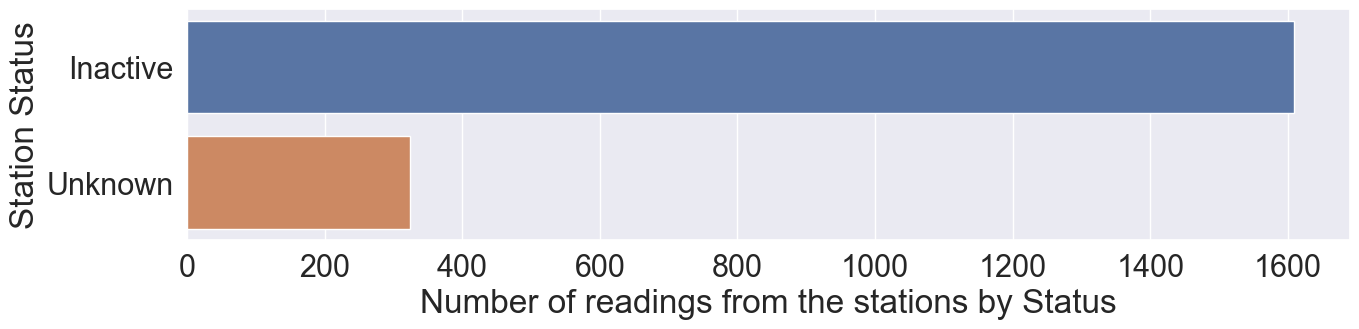

In [19]:
filter_not_active = df_station_day['Status'] != 'Active'
plot_sns_chart(df_station_day[filter_not_active], 'Status',
               xlabel_title="Number of readings from the stations by Status", ylabel_title = "Station Status",
               width=15.0, height=3.0)

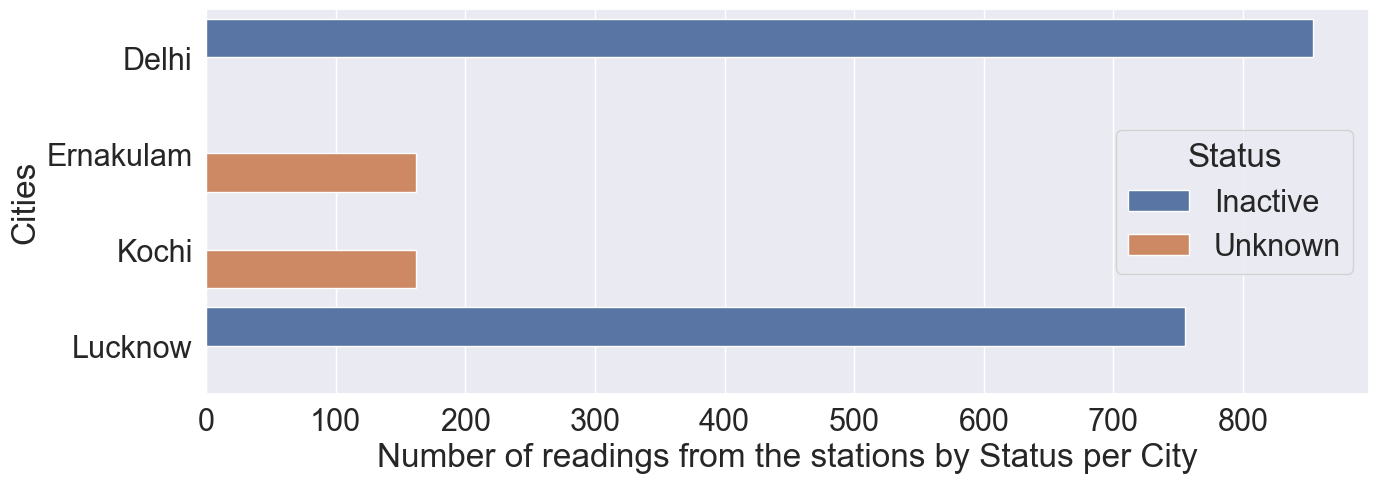

In [20]:
plot_sns_chart(df_station_day[filter_not_active].sort_values(by='City'), 'City', 'Status',
               xlabel_title="Number of readings from the stations by Status per City", ylabel_title = "Cities",
               width=15.0, height=5.0)

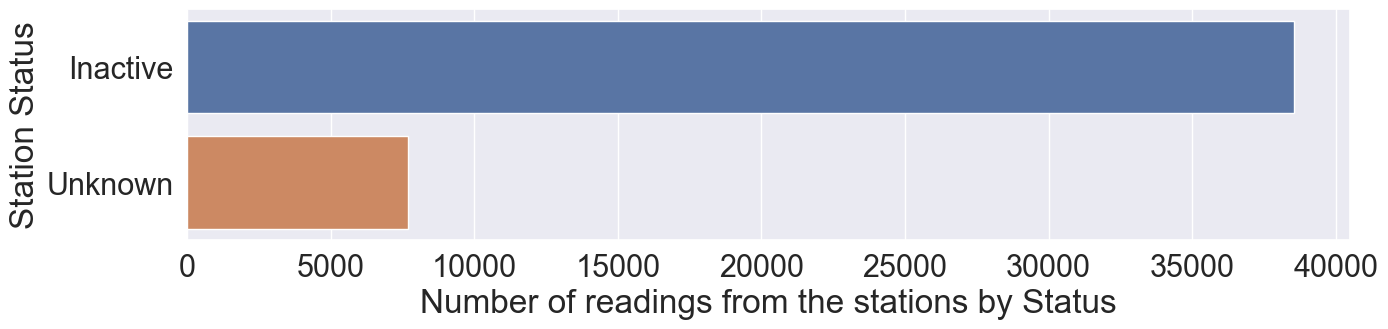

In [21]:
filter_not_active = df_station_hour['Status'] != 'Active'
plot_sns_chart(df_station_hour[filter_not_active], 'Status',
               xlabel_title="Number of readings from the stations by Status", ylabel_title = "Station Status",
               width=15.0, height=3.0)

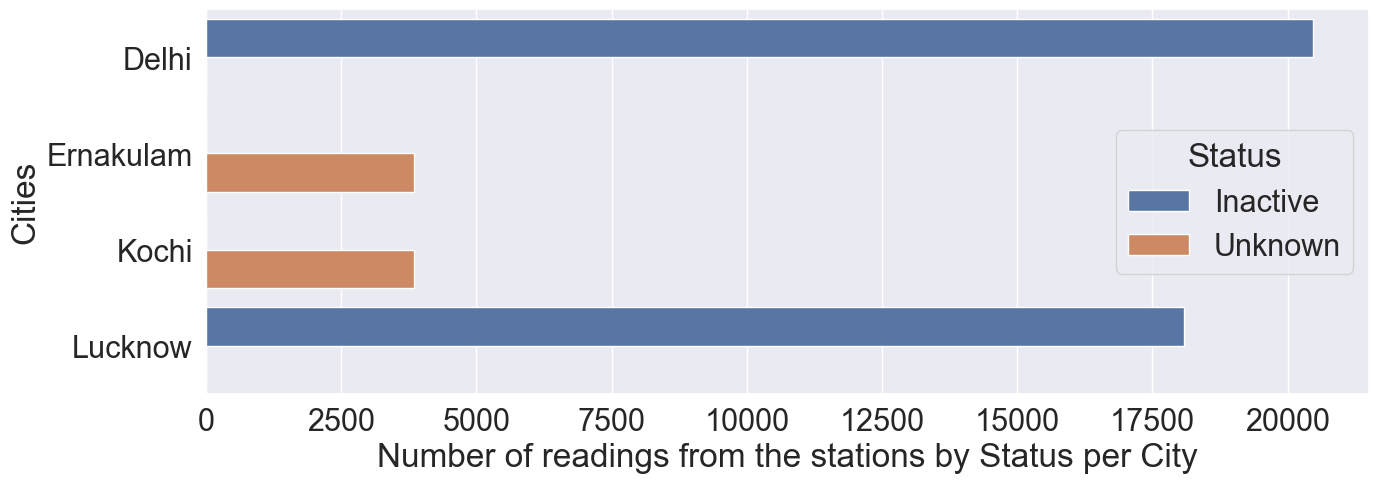

In [22]:
plot_sns_chart(df_station_hour[filter_not_active].sort_values(by='City'), 'City', 'Status',
               xlabel_title="Number of readings from the stations by Status per City", ylabel_title = "Cities",
               width=15.0, height=5.0)

In [23]:
df_city_day_fill_missing_values = df_city_day.fillna(0.00)
df_city_year_pivot_table = df_city_day_fill_missing_values.pivot_table(values='CO', index='City', columns='Year', aggfunc=np.mean)
df_city_year_pivot_table = calculate_percentage(df_city_year_pivot_table)

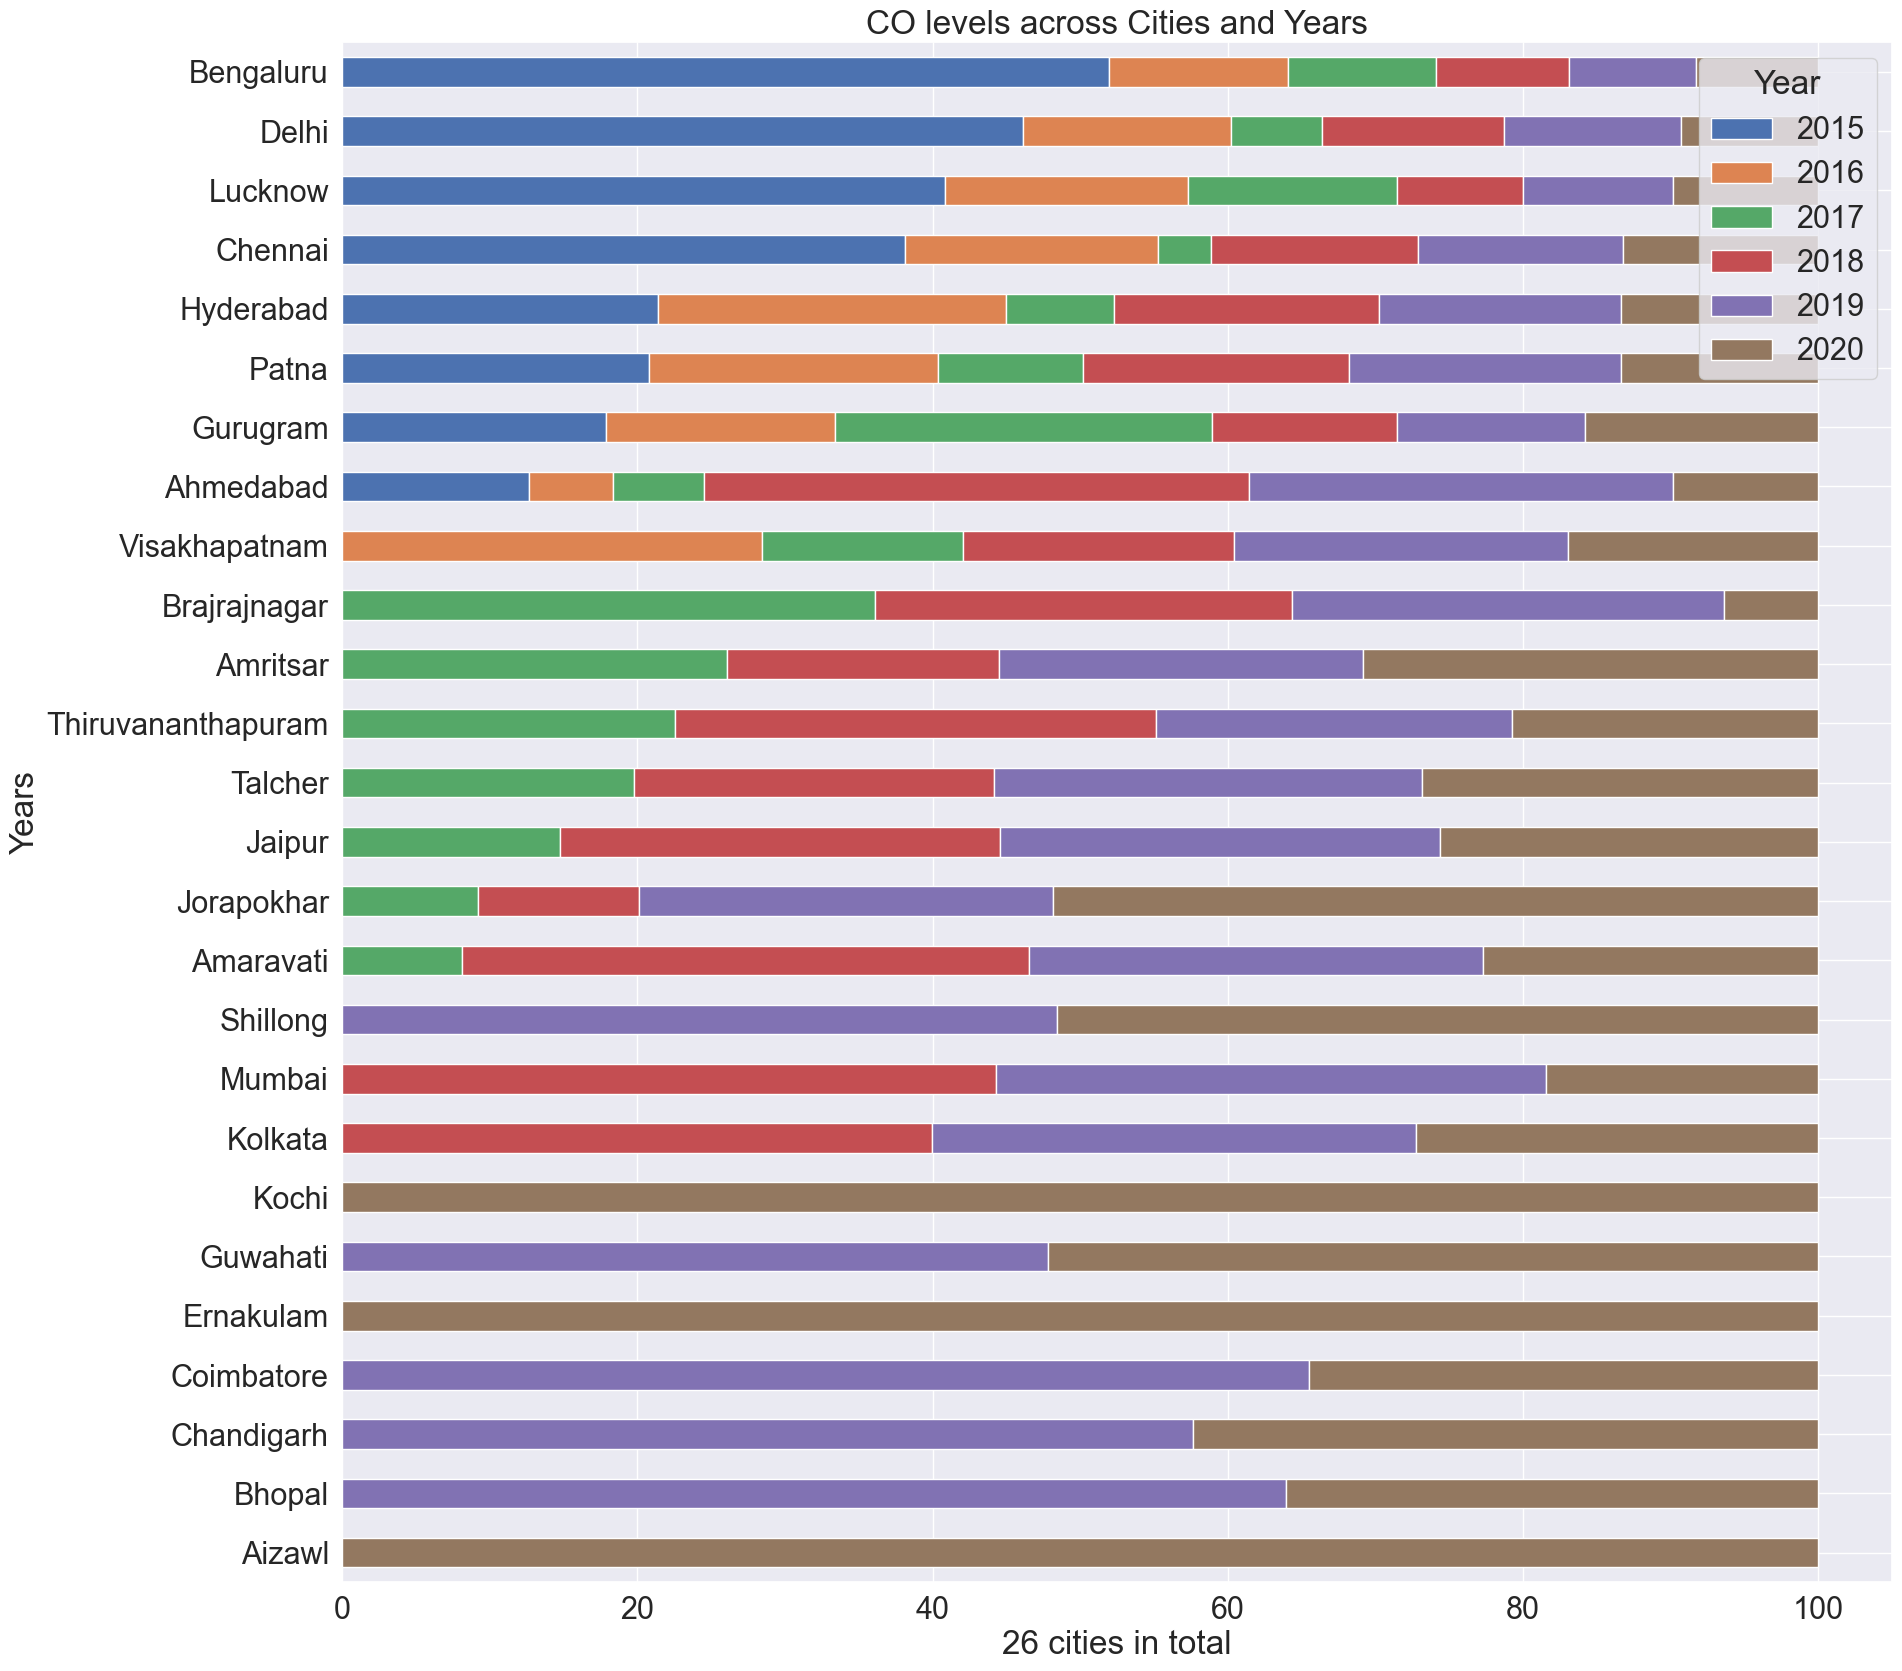

In [31]:
plot_chart(df_city_year_pivot_table.sort_values(by=[2015, 2016, 2017]), 
           title='CO levels across Cities and Years', 
           xlabel_title=f'{df_city_year_pivot_table.shape[0]} cities in total',
           ylabel_title='Years', 
           height=20.0,
           stacked=True)

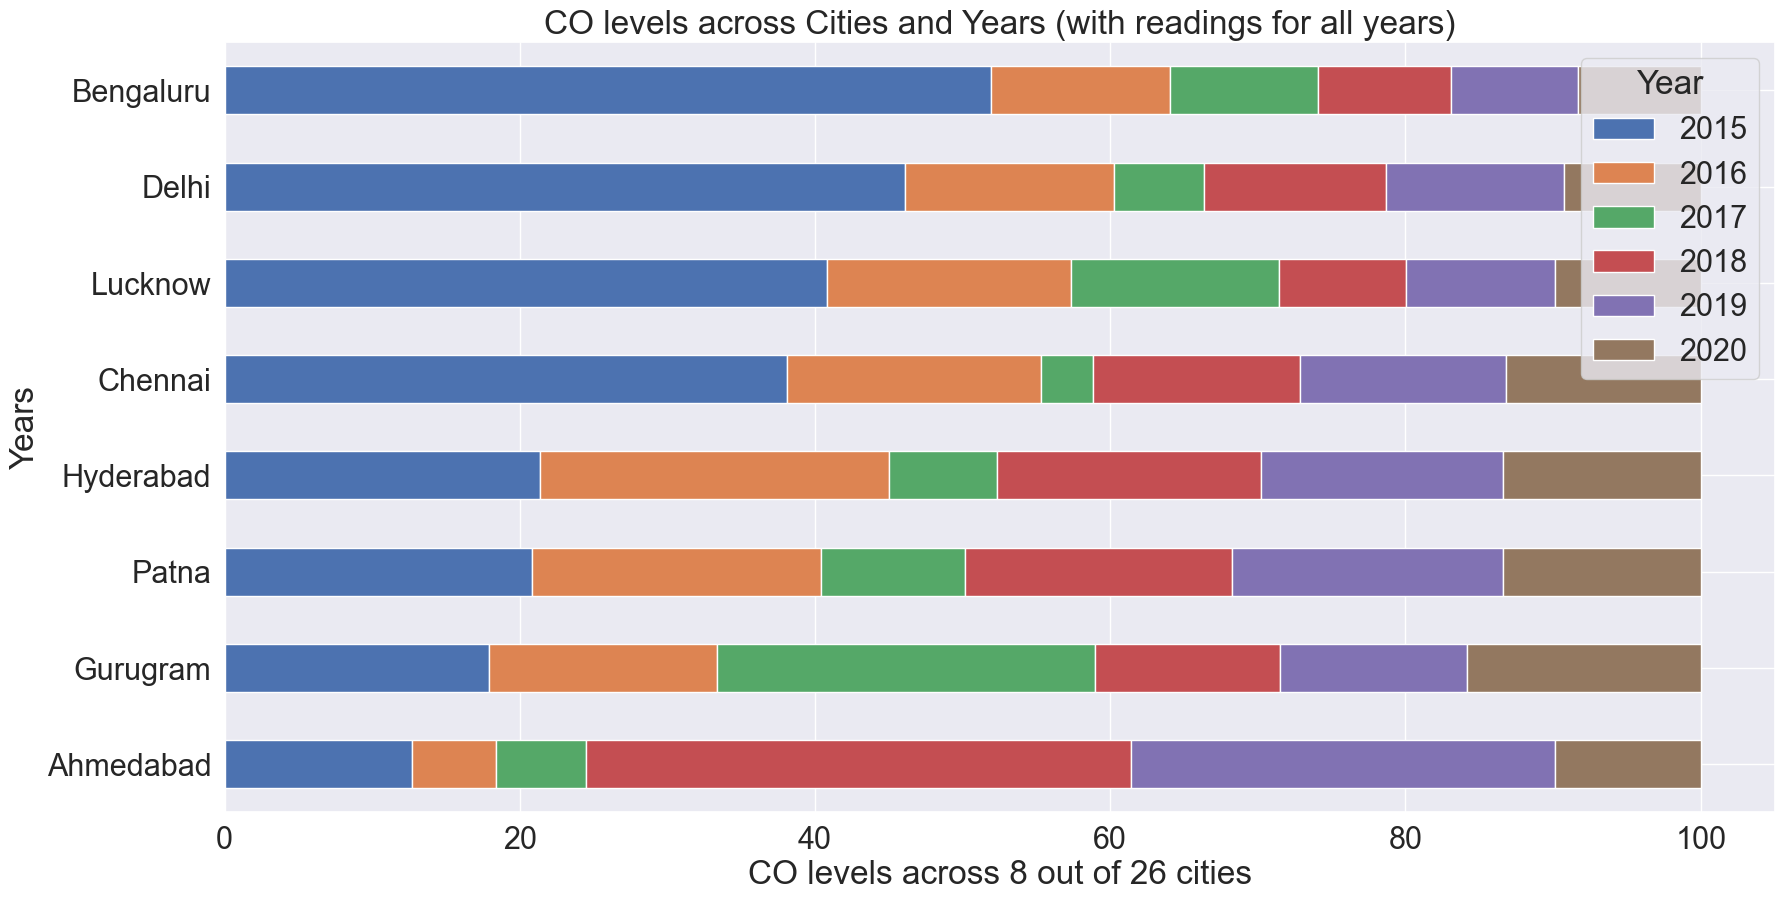

In [32]:
co_levels_all_readings_filter = True
for each_year in list(df_city_year_pivot_table.columns):
    co_levels_all_readings_filter = co_levels_all_readings_filter & (df_city_year_pivot_table[each_year] > 0.0)
filtered_dataset = df_city_year_pivot_table[co_levels_all_readings_filter].sort_values(by=[2015, 2020])
plot_chart(filtered_dataset.sort_values(by=[2015, 2016, 2017]), 
           title='CO levels across Cities and Years (with readings for all years)', 
           xlabel_title=f'CO levels across {filtered_dataset.shape[0]} out of {df_city_year_pivot_table.shape[0]} cities',
           ylabel_title='Years', 
           height=10.0,
           stacked=True)

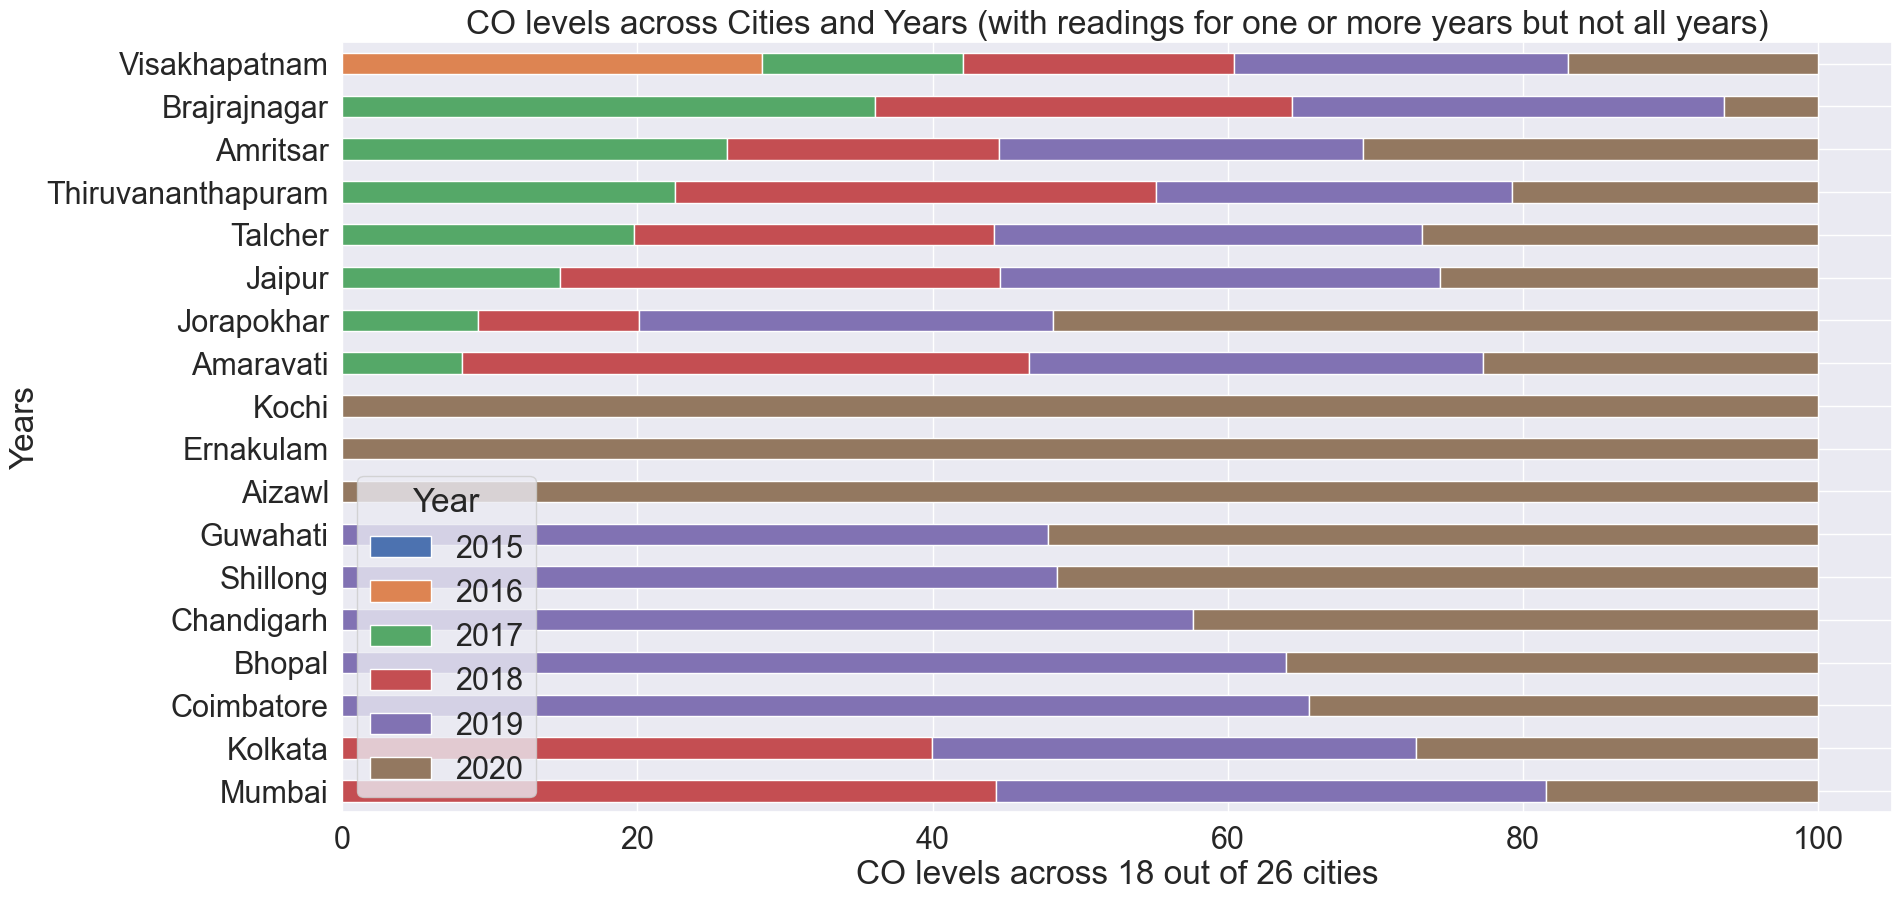

In [33]:
co_levels_any_readings_filter = ~co_levels_all_readings_filter
filtered_dataset = df_city_year_pivot_table[co_levels_any_readings_filter].sort_values(by=[2015, 2020])
plot_chart(filtered_dataset.sort_values(by=[2015, 2016, 2017]), 
           title='CO levels across Cities and Years (with readings for one or more years but not all years)', 
           xlabel_title=f'CO levels across {filtered_dataset.shape[0]} out of {df_city_year_pivot_table.shape[0]} cities',
           ylabel_title='Years', 
           height=10.0,
           stacked=True)

In [34]:
df_city_day_fill_missing_values = df_city_day.fillna(0.00)
df_city_season_pivot_table = df_city_day_fill_missing_values.sort_values(by=['City'], ascending=True) \
                                .pivot_table(values='CO', index='City', columns='Season', aggfunc=np.mean)
df_city_season_pivot_table = df_city_season_pivot_table.sort_values(by='1. Winter')
df_city_season_pivot_table = calculate_percentage(df_city_season_pivot_table)

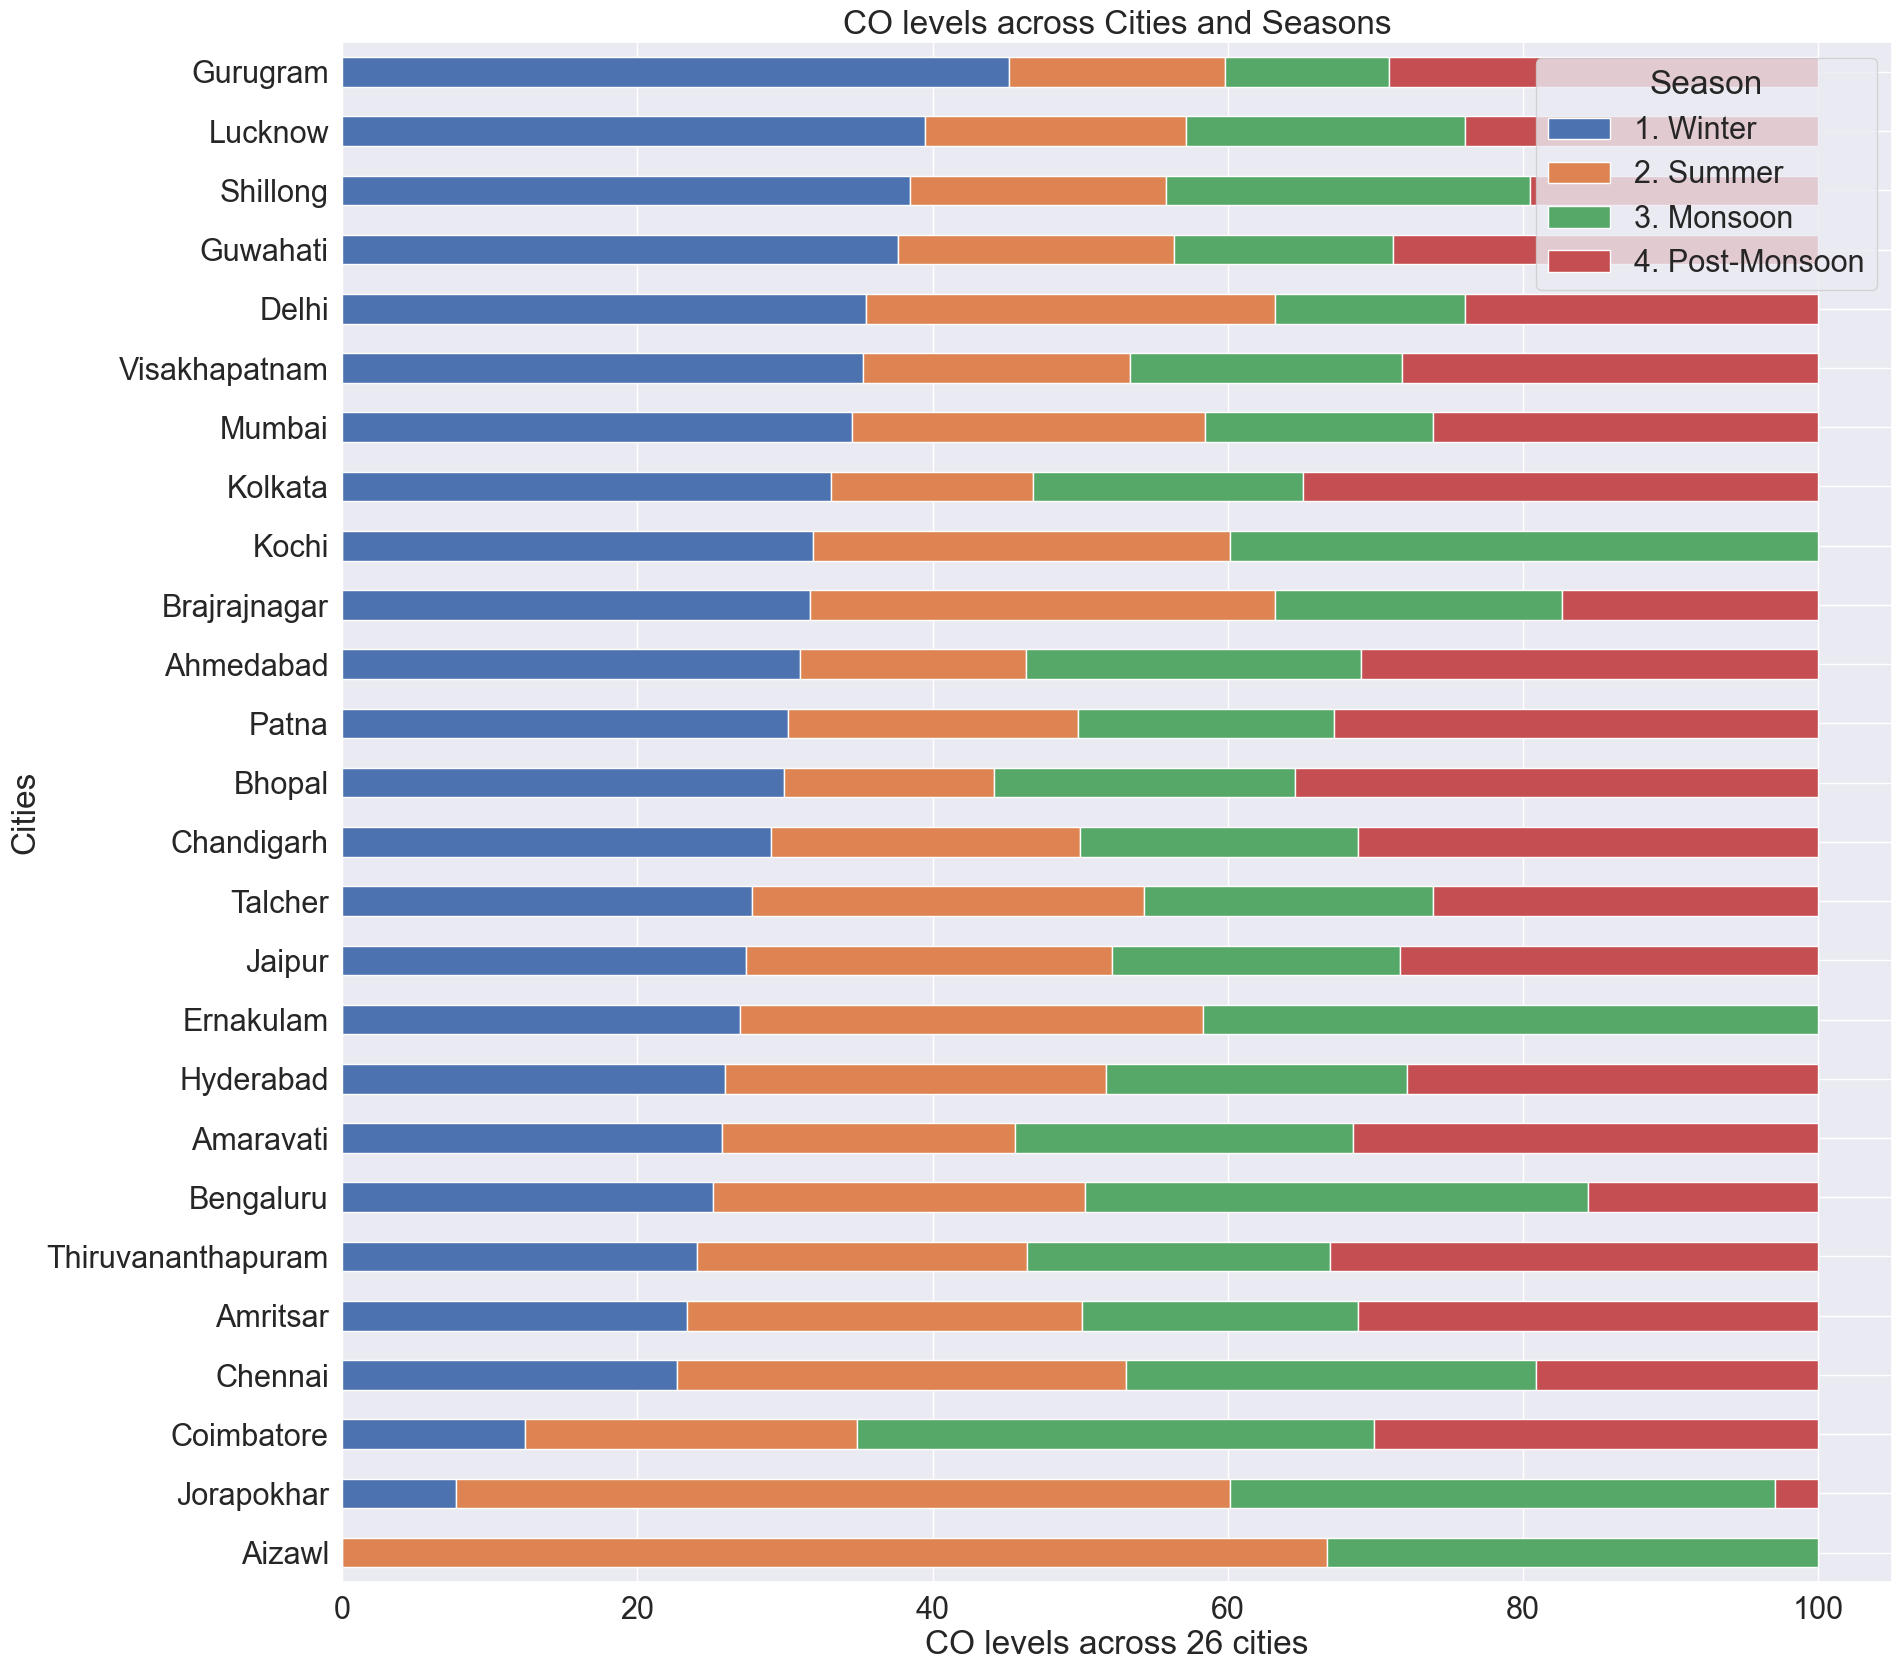

In [35]:
plot_chart(df_city_season_pivot_table.sort_values(['1. Winter', '2. Summer']), 
           title='CO levels across Cities and Seasons', 
           xlabel_title=f'CO levels across {df_city_season_pivot_table.shape[0]} cities',
           ylabel_title='Cities', height=20.0, stacked=True)

In [36]:
df_city_day_fill_missing_values = df_city_day.fillna(0.00)
df_city_month_pivot_table = df_city_day_fill_missing_values.sort_values(by=['City'], ascending=False) \
                                .pivot_table(values='CO', index='City', columns='Month', aggfunc=np.mean)
df_city_month_pivot_table = calculate_percentage(df_city_month_pivot_table)

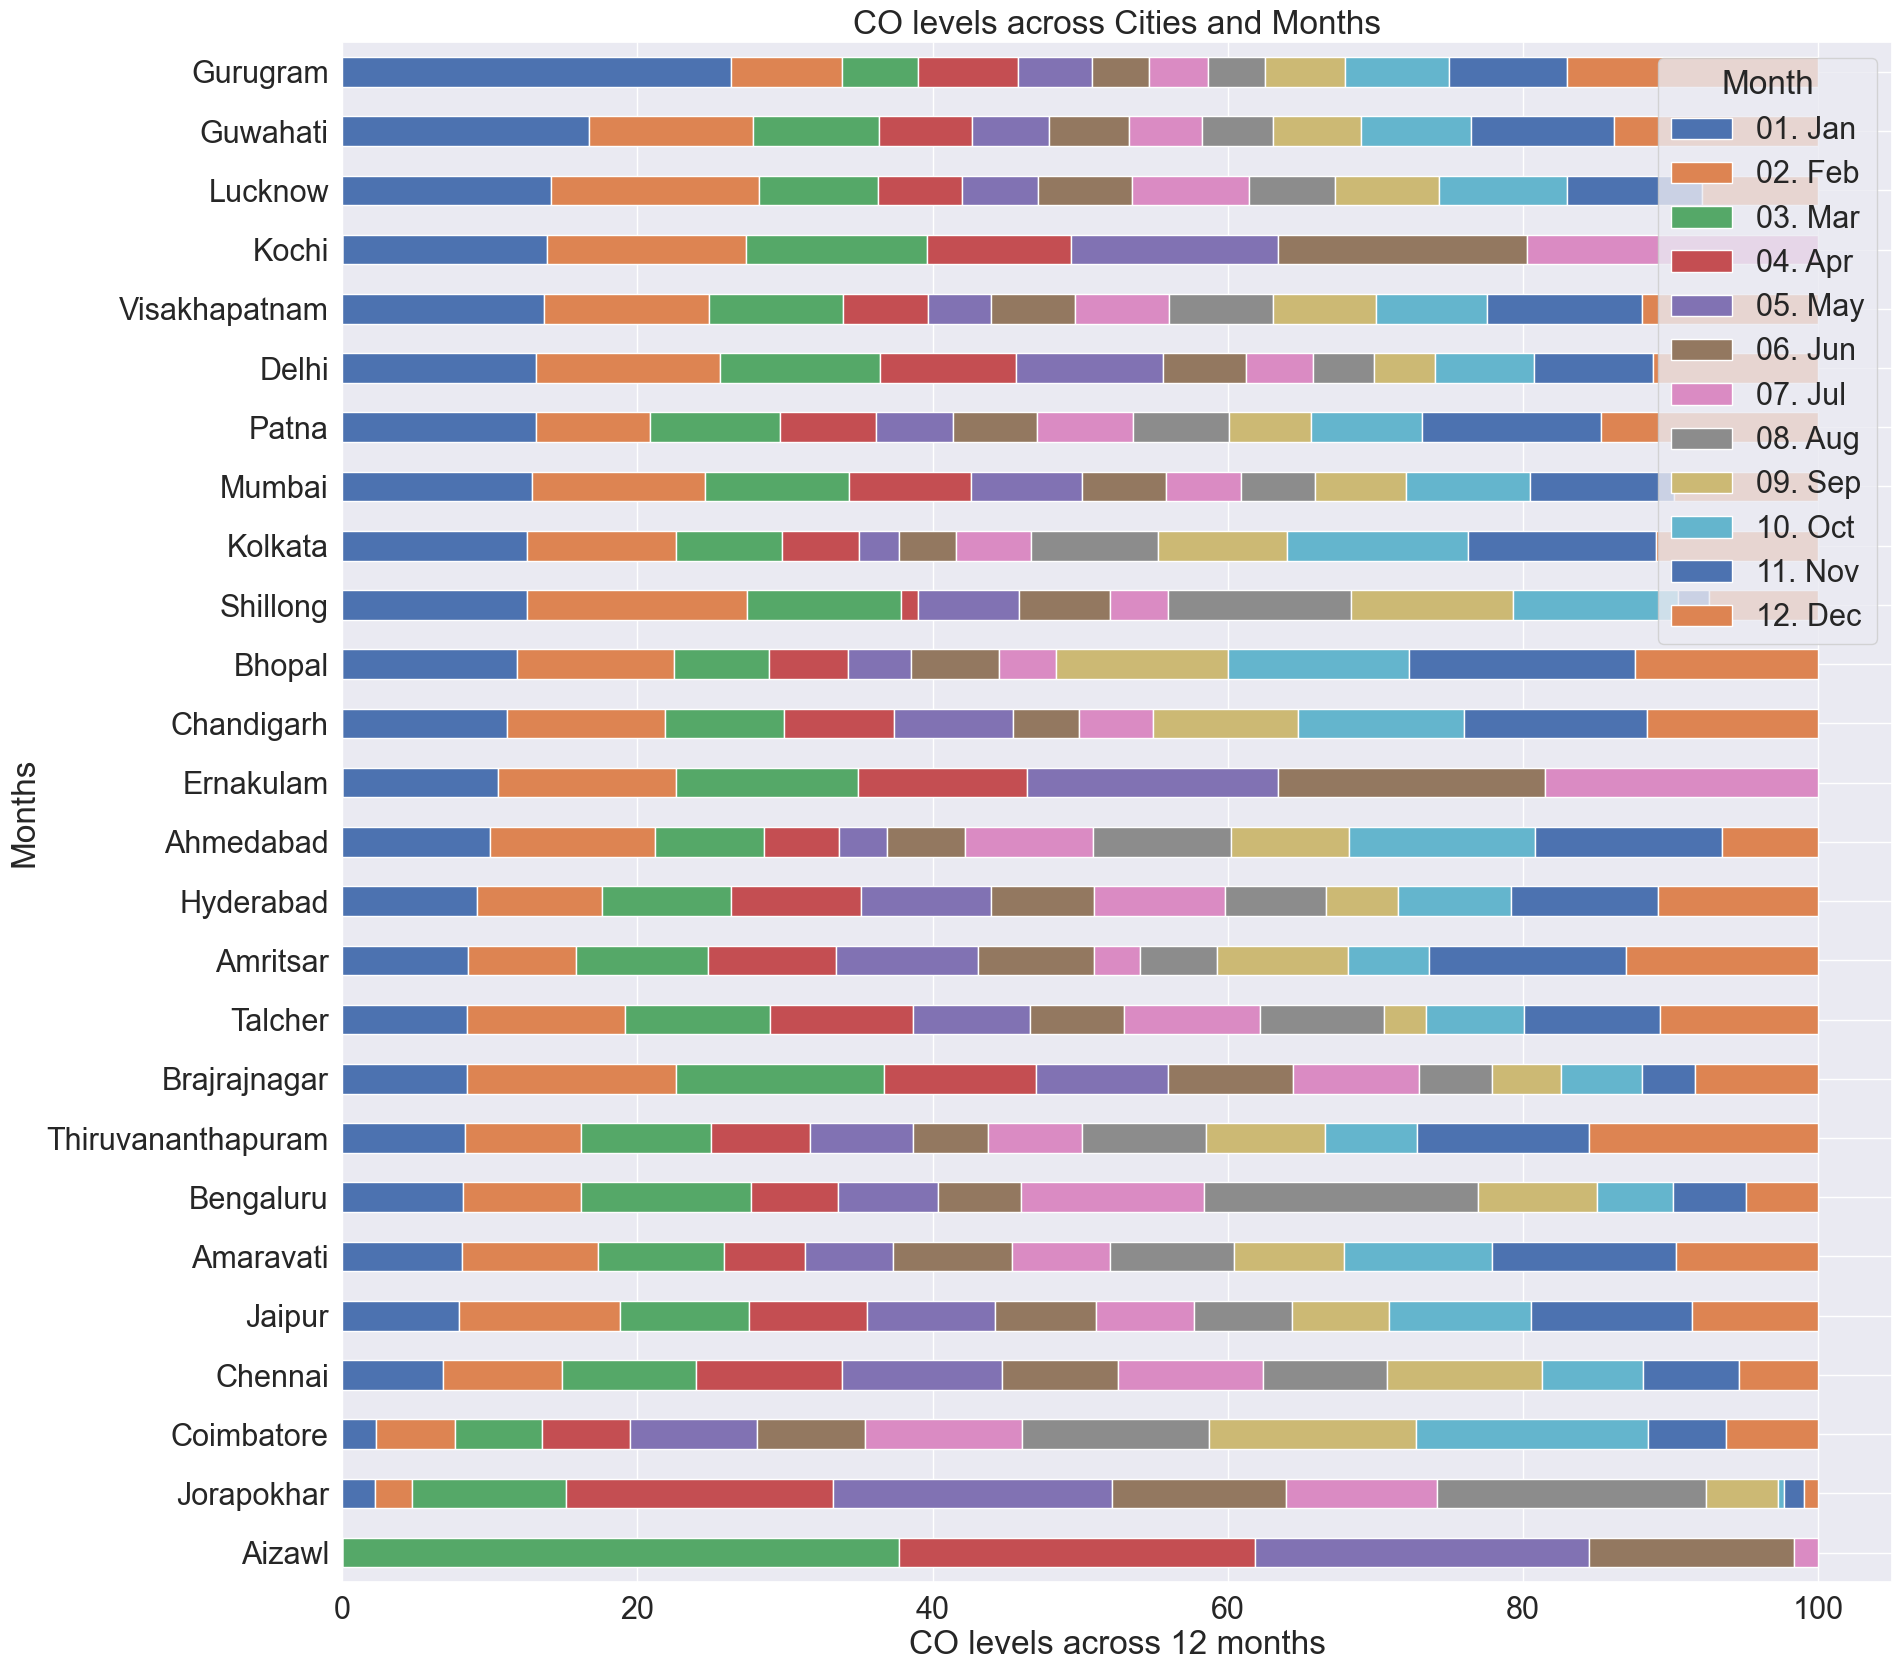

In [37]:
plot_chart(df_city_month_pivot_table.sort_values(by=['01. Jan', '02. Feb', '03. Mar']), 
           title='CO levels across Cities and Months', 
           xlabel_title='CO levels across 12 months', ylabel_title='Months', 
           height=20.0, stacked=True)

In [38]:
df_city_hour_pivot_table = df_city_hour.sort_values(by=['City'], ascending=True) \
                                .pivot_table(values='CO', index='City', columns='Weekday_or_weekend', aggfunc=np.mean)
df_city_hour_pivot_table = df_city_hour_pivot_table.sort_values(by='Weekday')

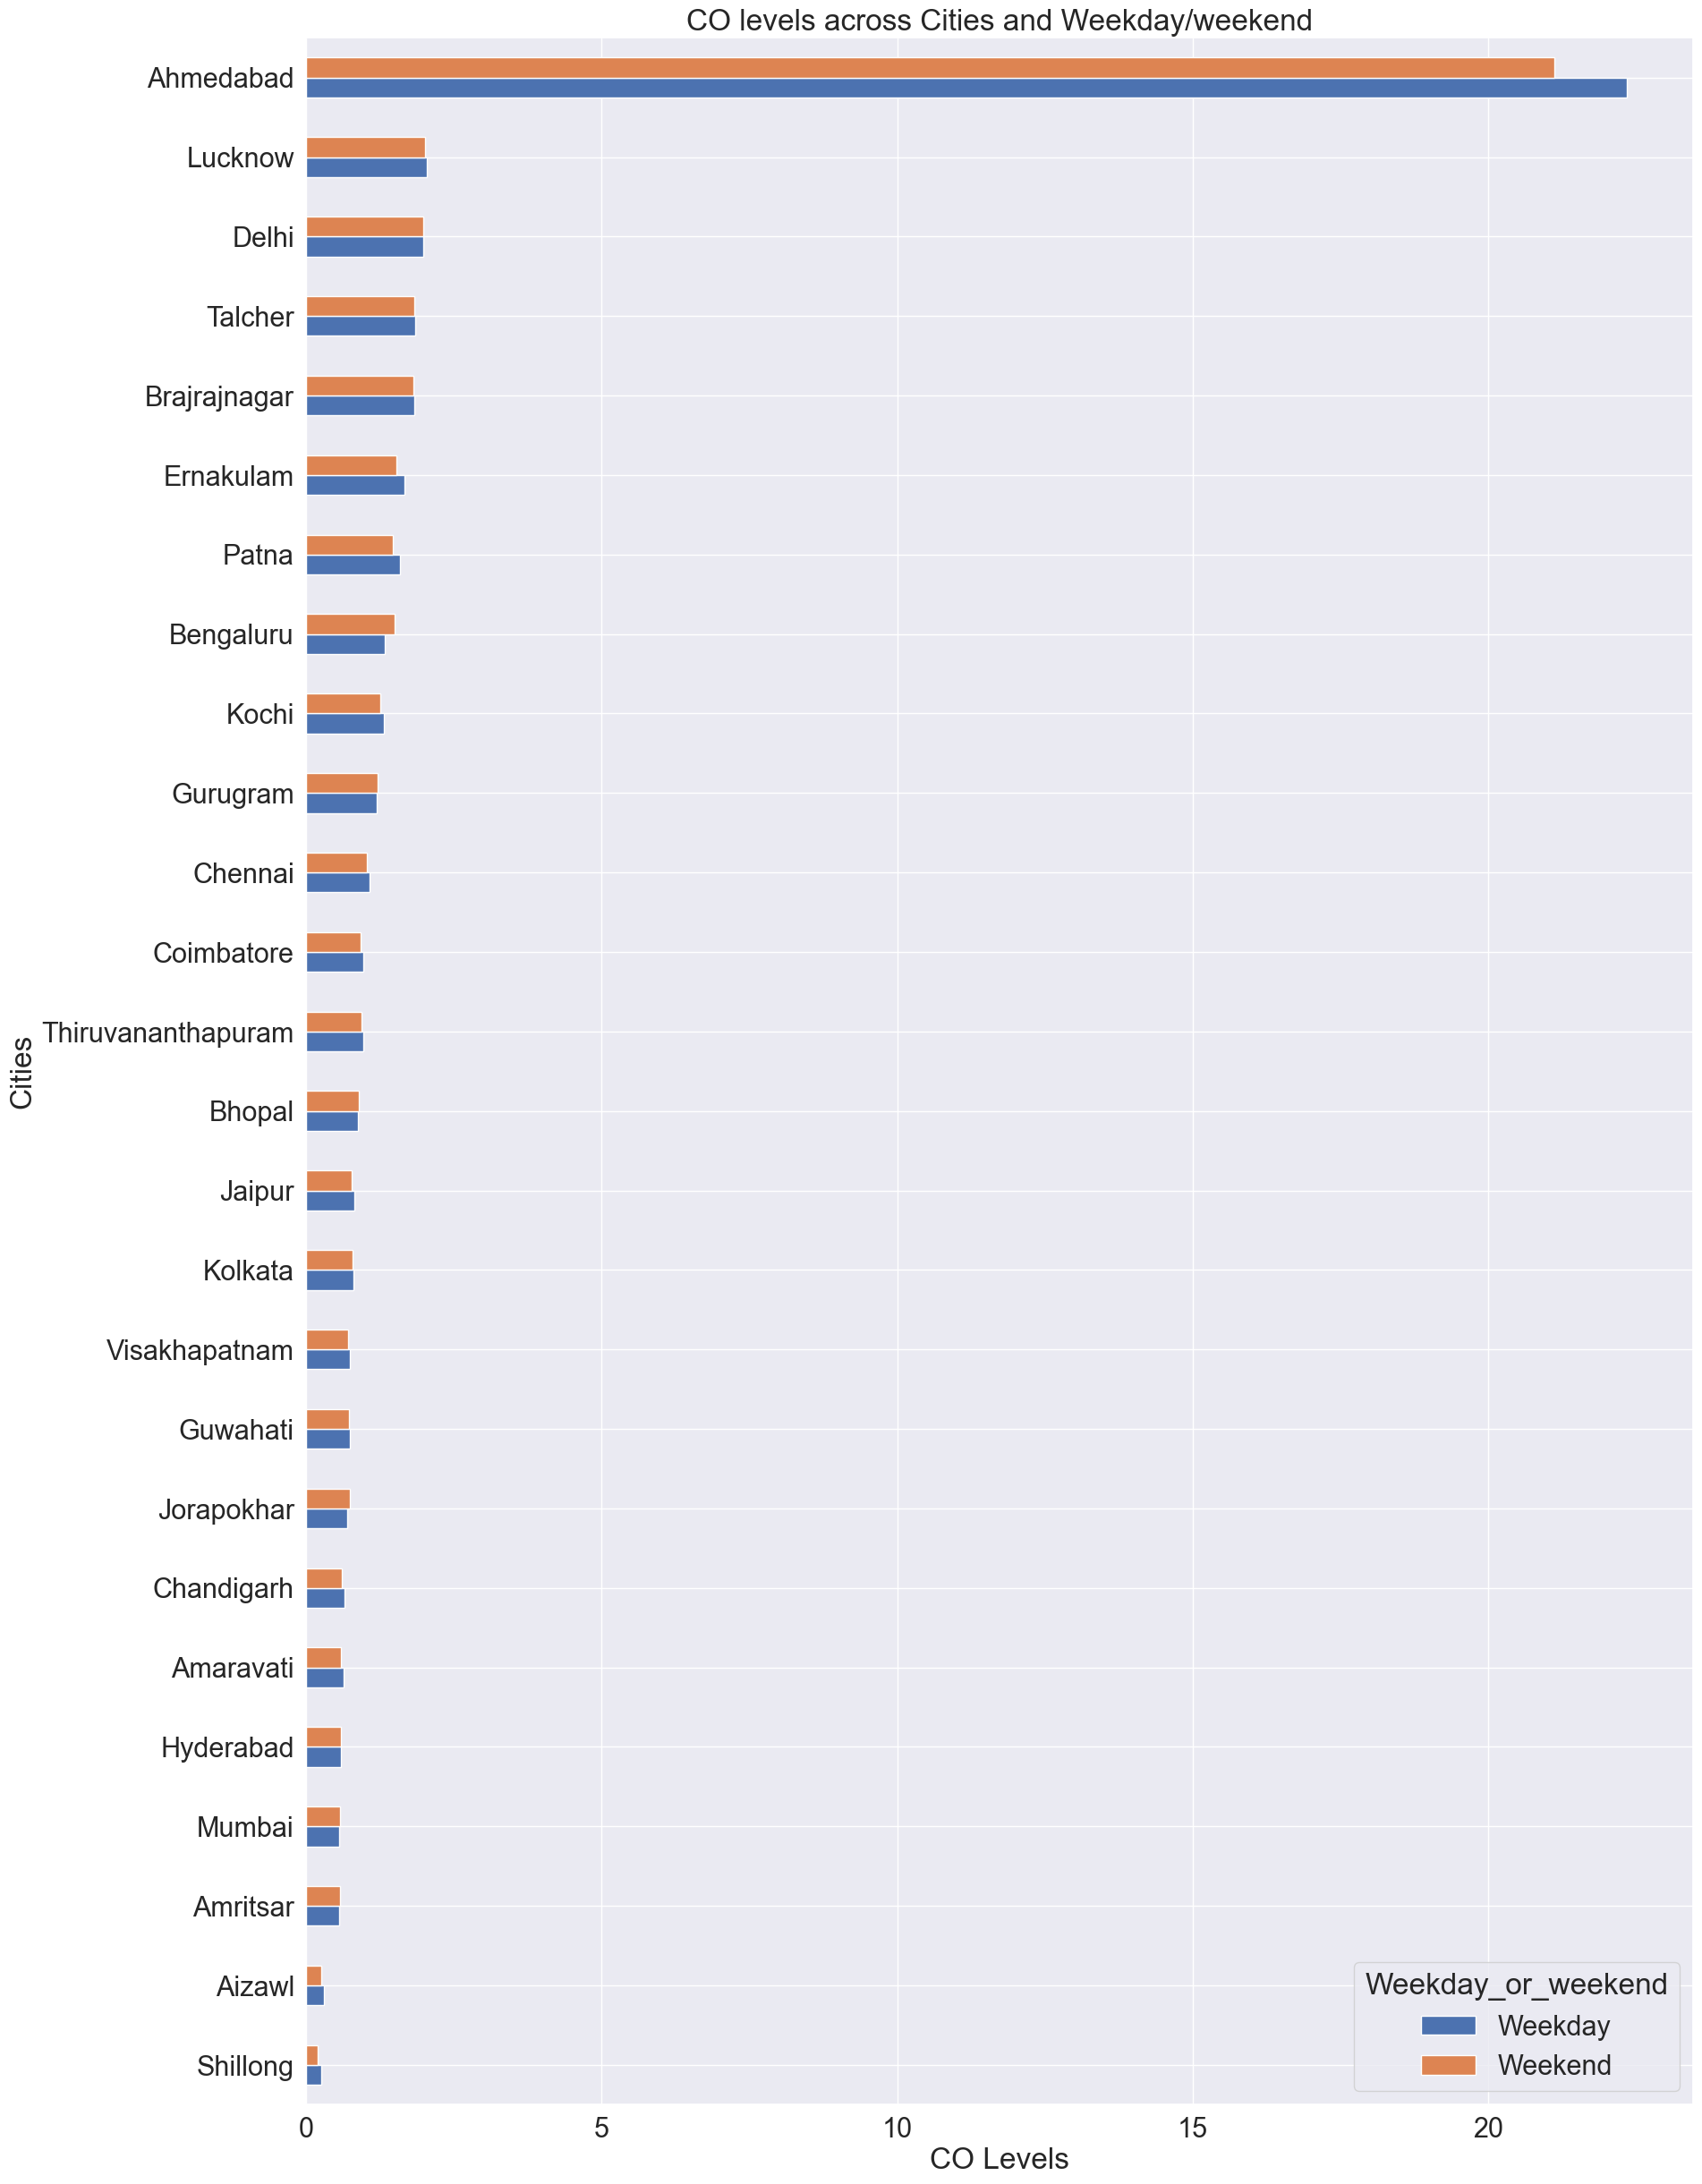

In [39]:
plot_chart(df_city_hour_pivot_table.sort_values('Weekday'), 
           title='CO levels across Cities and Weekday/weekend', 
           xlabel_title='CO Levels',
           ylabel_title='Cities',
           stacked=False,
           height=30.0)

In [40]:
df_city_hour_pivot_table = df_city_hour.sort_values(by=['City'], ascending=True) \
                                .pivot_table(values='CO', index='City', columns='Regular_day_or_holiday', aggfunc=np.mean)
df_city_hour_pivot_table = calculate_percentage(df_city_hour_pivot_table)
df_city_hour_pivot_table = df_city_hour_pivot_table.sort_values(by='Holiday (or Festival)')

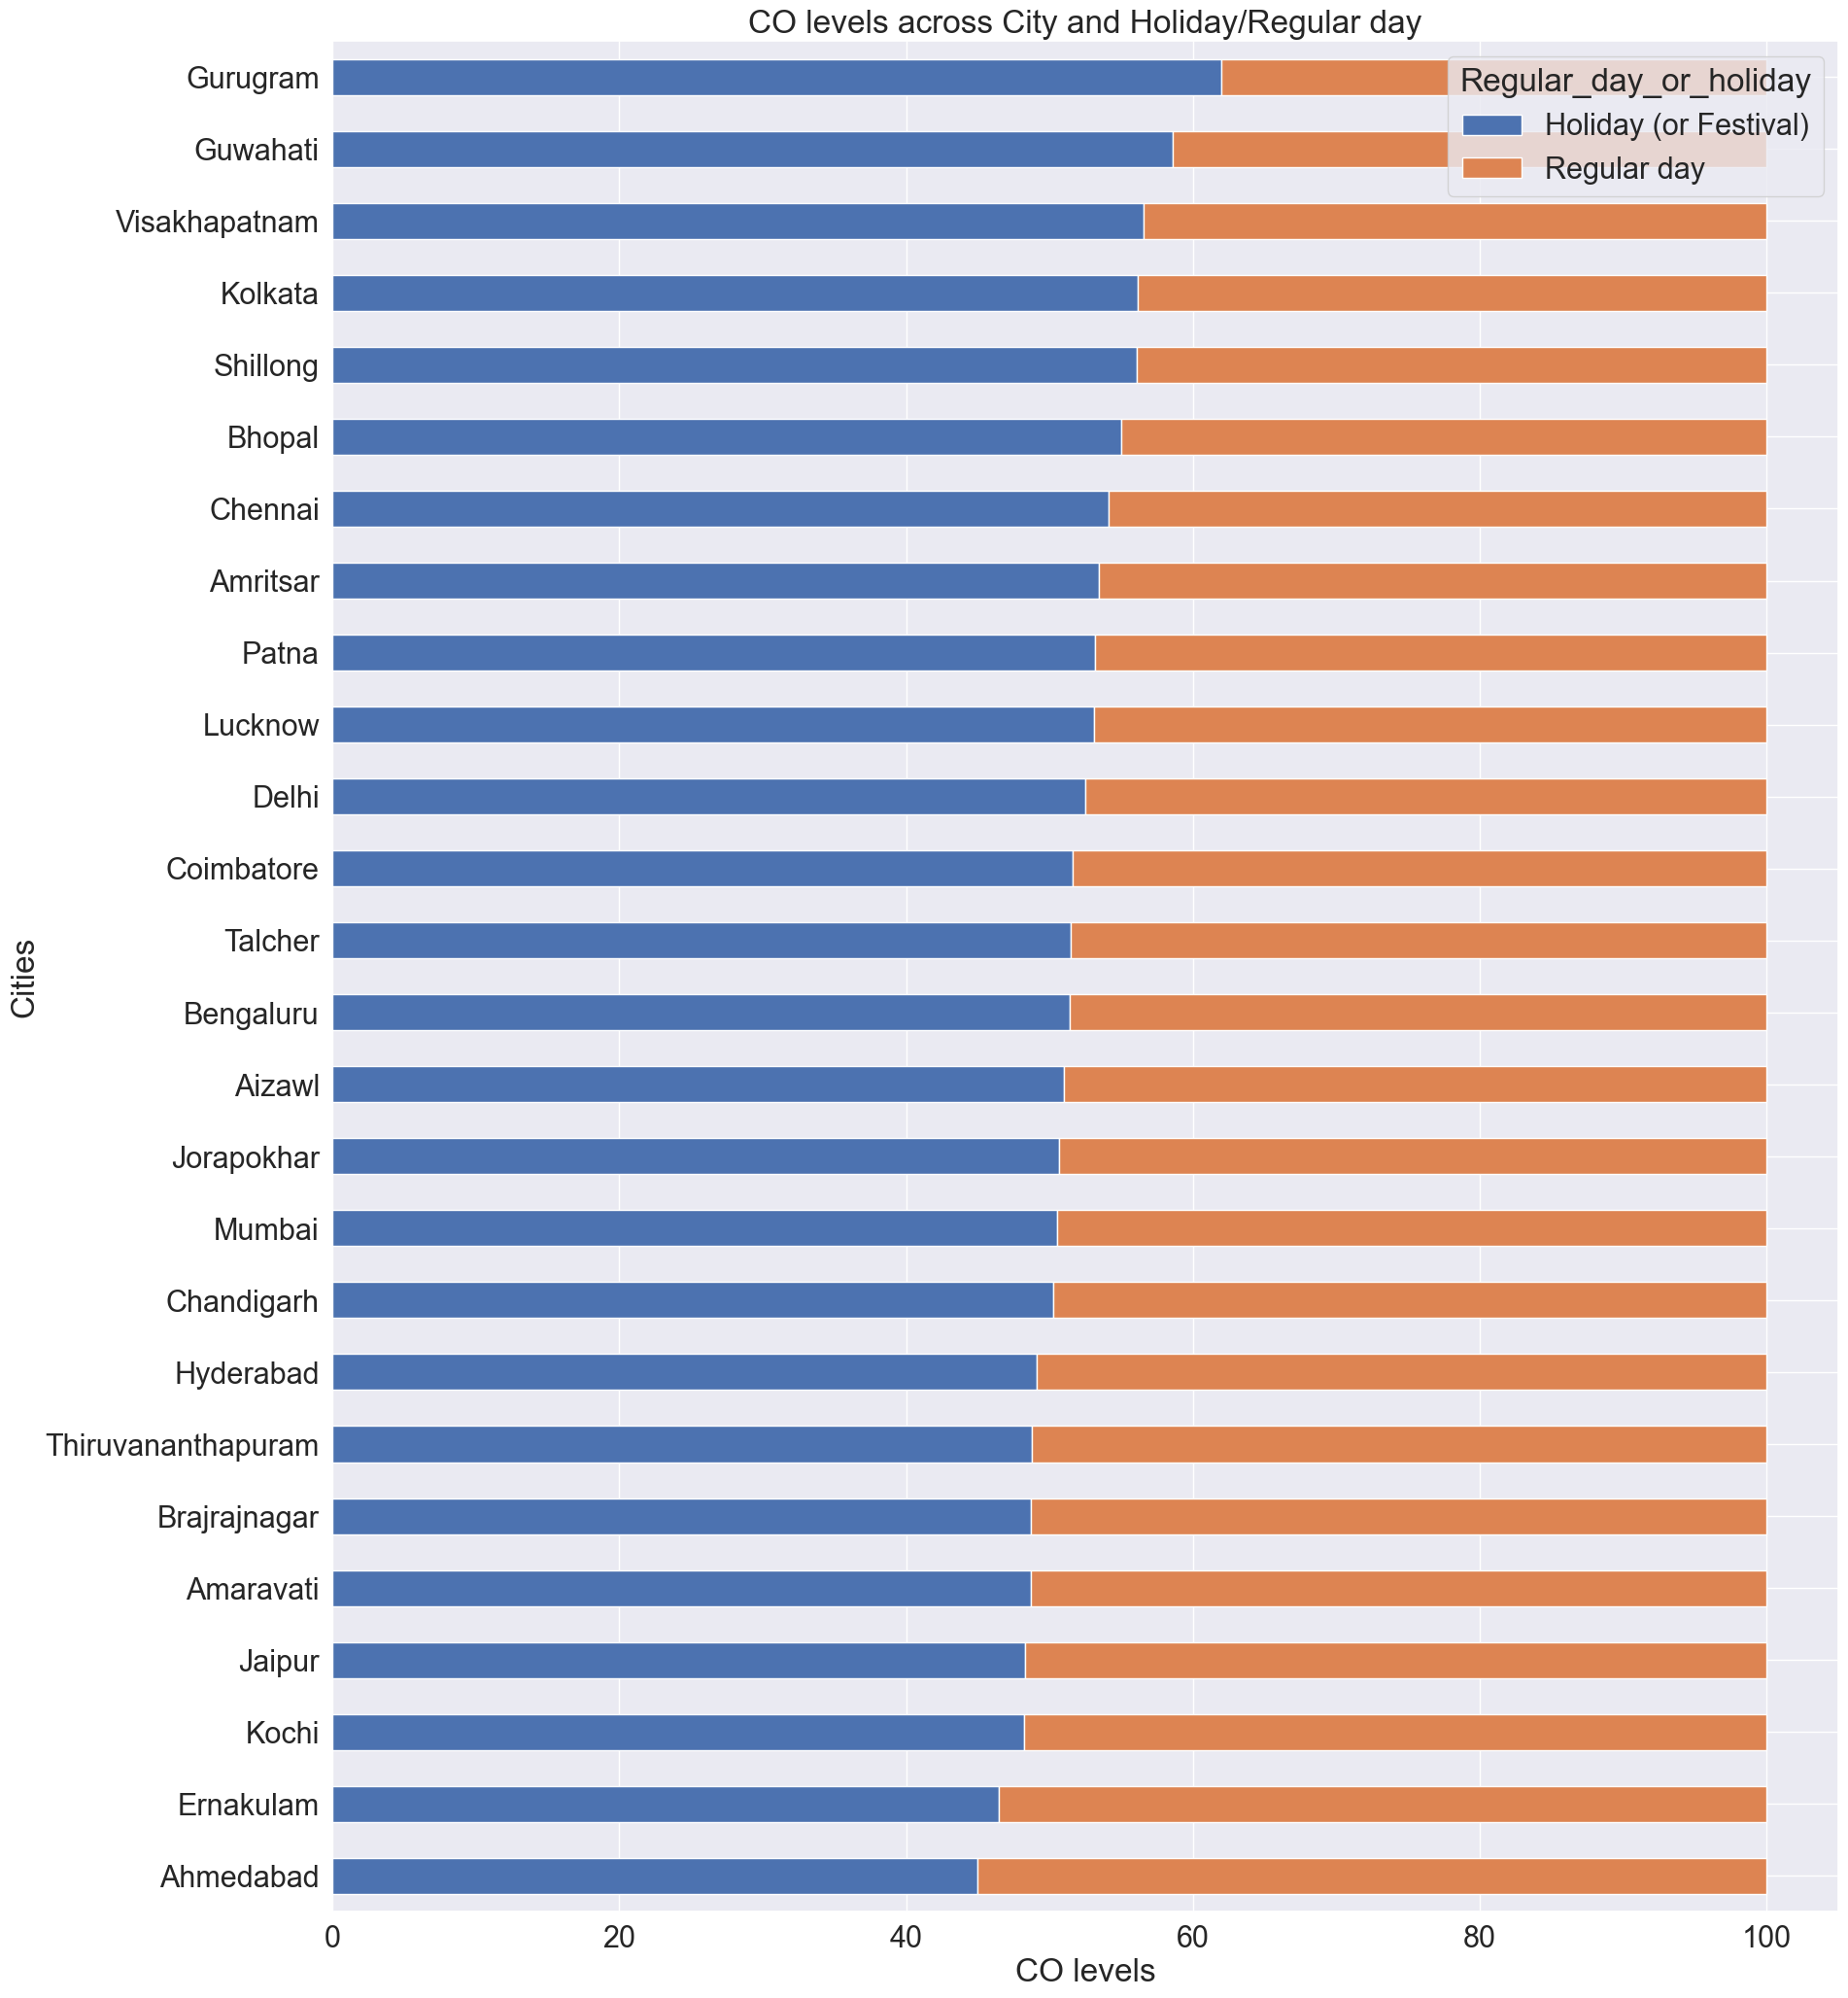

In [41]:
plot_chart(df_city_hour_pivot_table, 
           title='CO levels across City and Holiday/Regular day', 
           xlabel_title='CO levels',
           ylabel_title='Cities',
           stacked=True,
           height=25.0)

In [42]:
df_city_hour_pivot_table = df_city_hour.sort_values(by=['City'], ascending=True) \
                                .pivot_table(values='CO', index='City', columns='Day_period', aggfunc=np.mean)
df_city_hour_pivot_table = calculate_percentage(df_city_hour_pivot_table)
df_city_hour_pivot_table = df_city_hour_pivot_table.sort_values(by=['4. Night', '1. Morning', '2. Afternoon'])

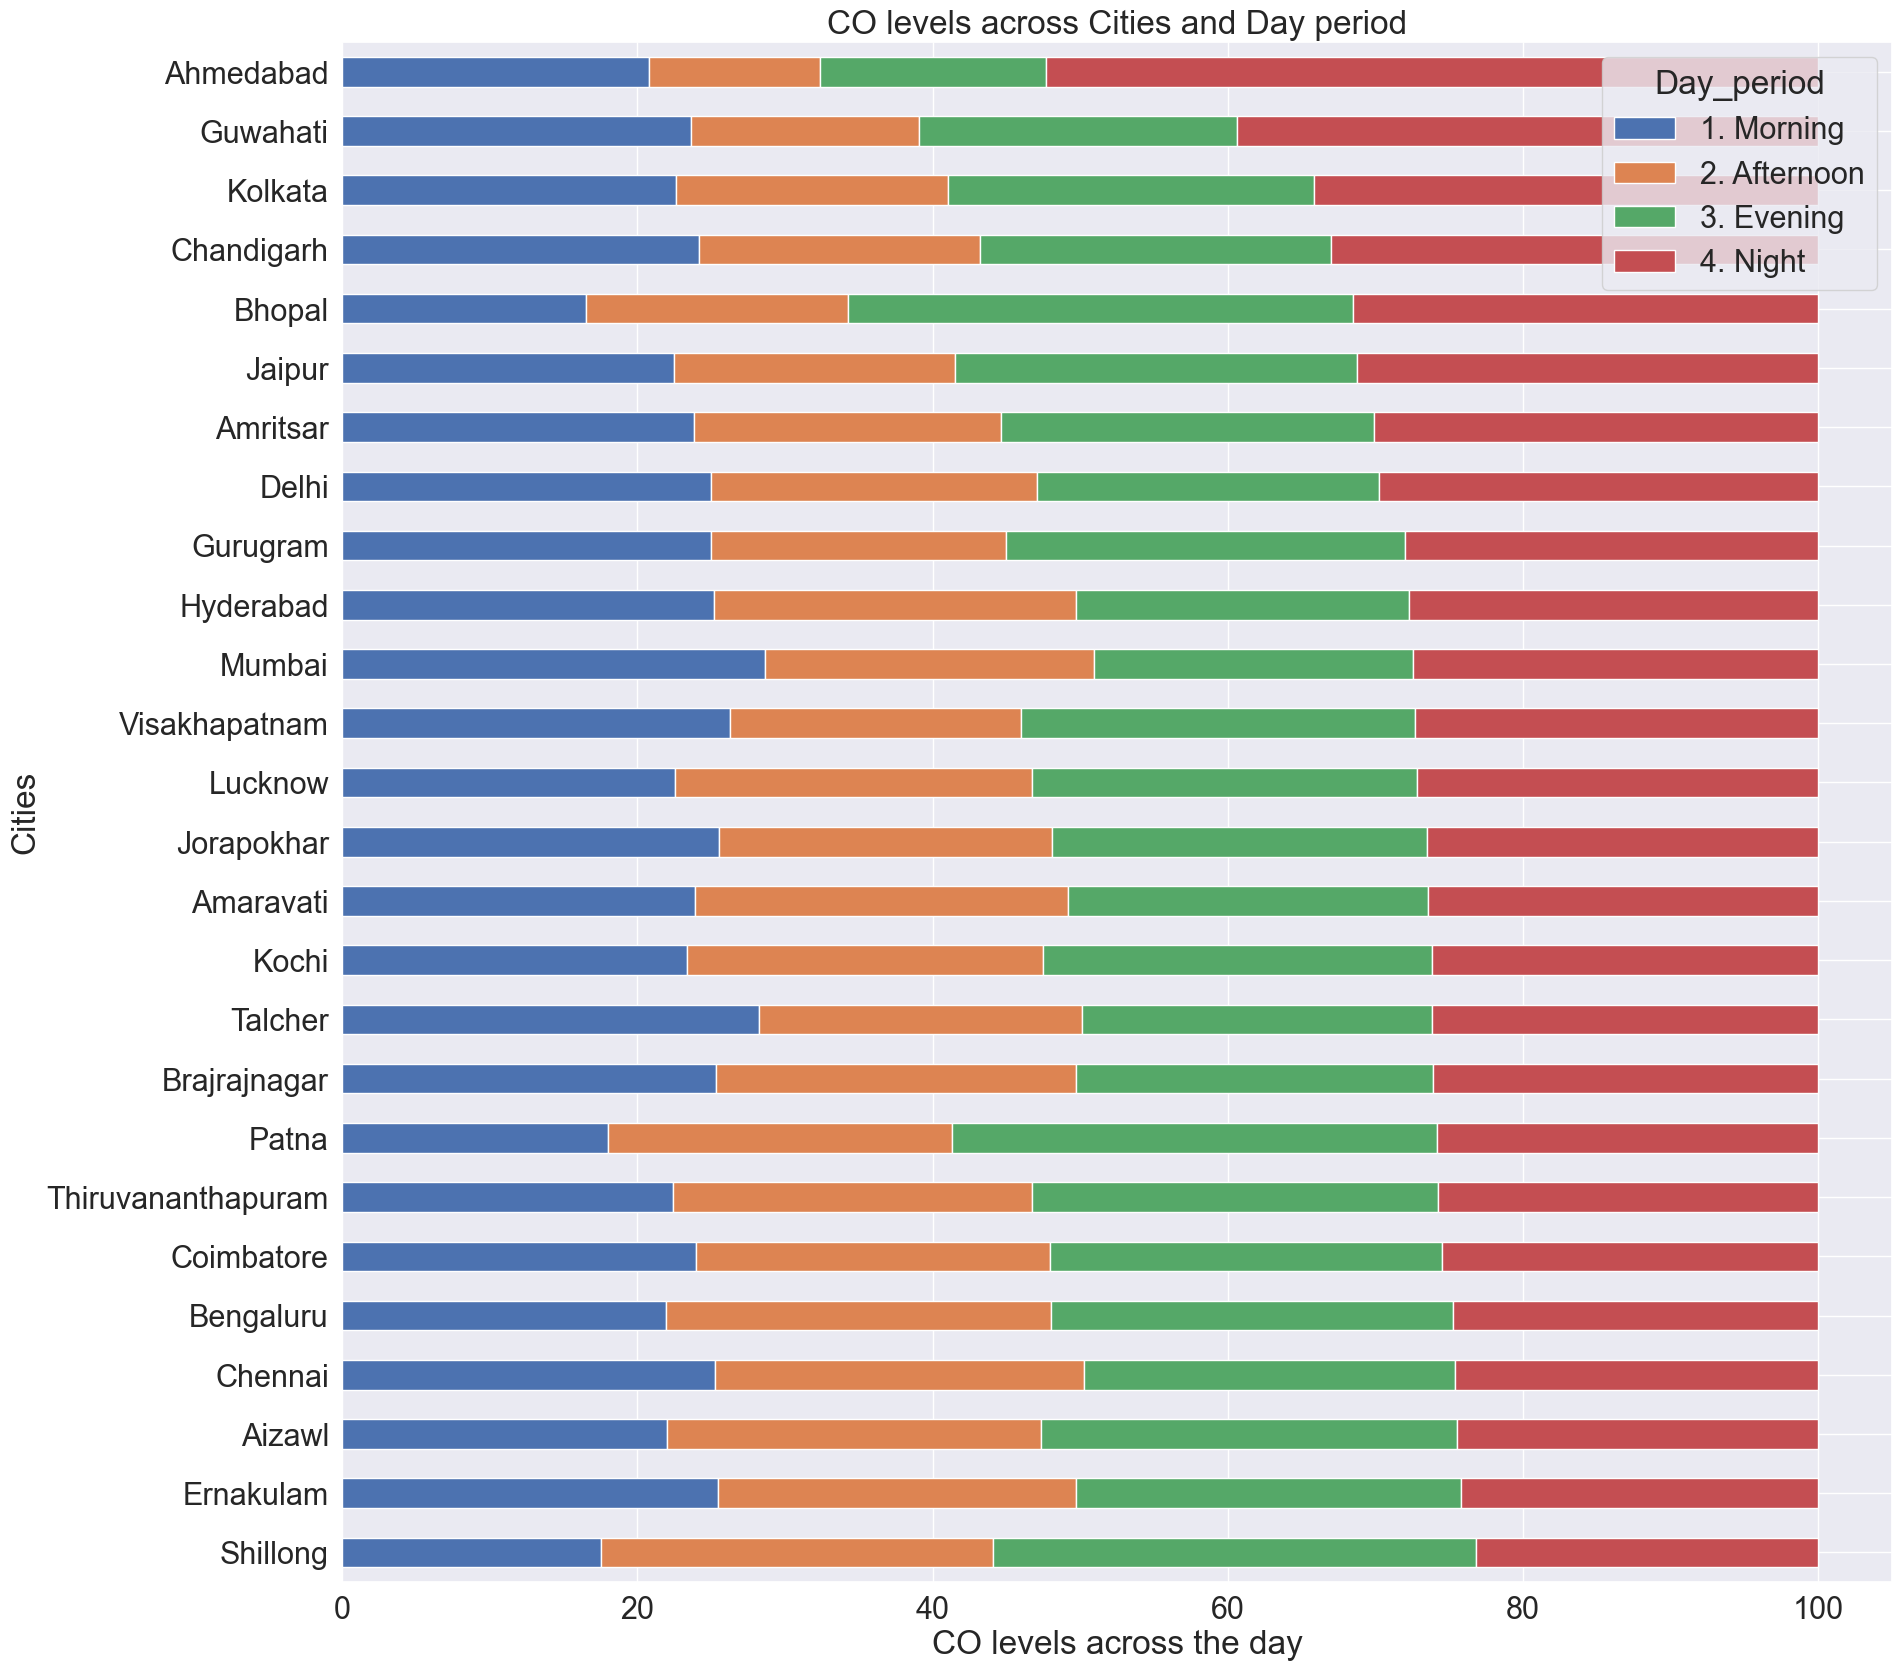

In [43]:
plot_chart(df_city_hour_pivot_table, title='CO levels across Cities and Day period', 
           xlabel_title='CO levels across the day', 
           ylabel_title='Cities', 
           stacked=True, 
           height=20.0)

In [44]:
df_station_day_pivot_table = df_station_day.sort_values(by=['AQI', 'AQI_Bucket'], ascending=False) \
                                .pivot_table(values='AQI', index='City', columns='AQI_Bucket', aggfunc=np.mean)
df_station_day_pivot_table = calculate_percentage(df_station_day_pivot_table)
df_station_day_pivot_table = df_station_day_pivot_table.sort_values(by=['Good', 'Satisfactory'])

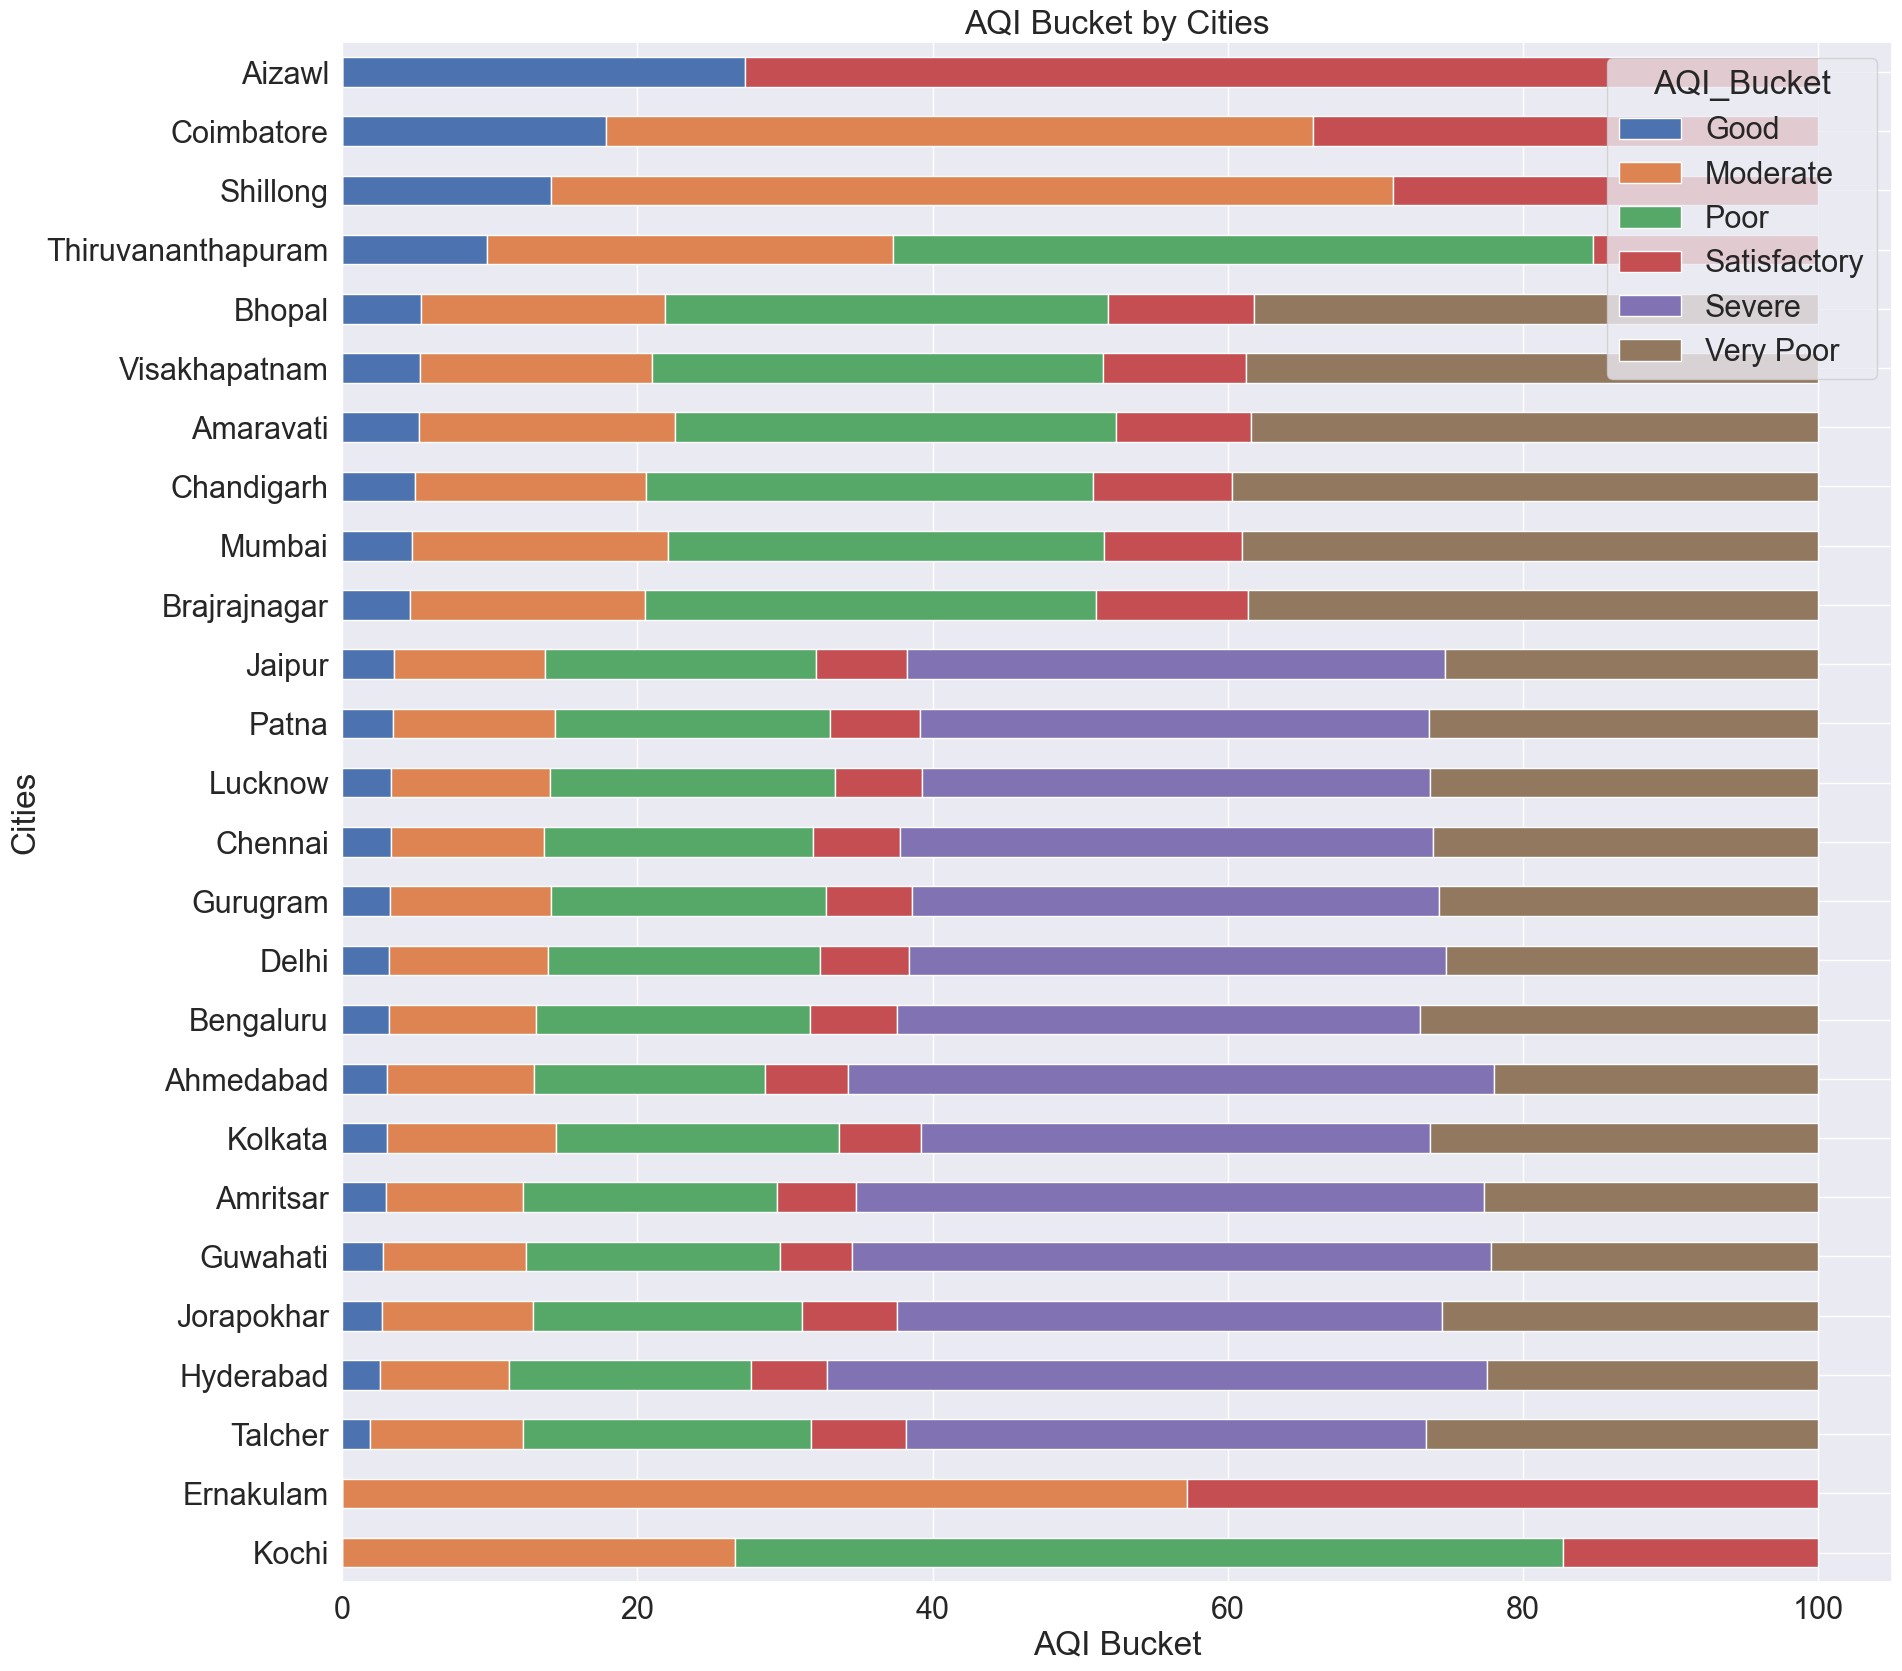

In [45]:
plot_chart(df_station_day_pivot_table, title='AQI Bucket by Cities', 
           xlabel_title='AQI Bucket',ylabel_title='Cities', 
           stacked=True, height=20.0)

In [46]:
all_readings_available_filter = True
columns = list(set(df_station_day_pivot_table.columns) - set(['Unknown']))
for each_rating in columns:
    all_readings_available_filter = all_readings_available_filter & (df_station_day_pivot_table[each_rating] > 0)

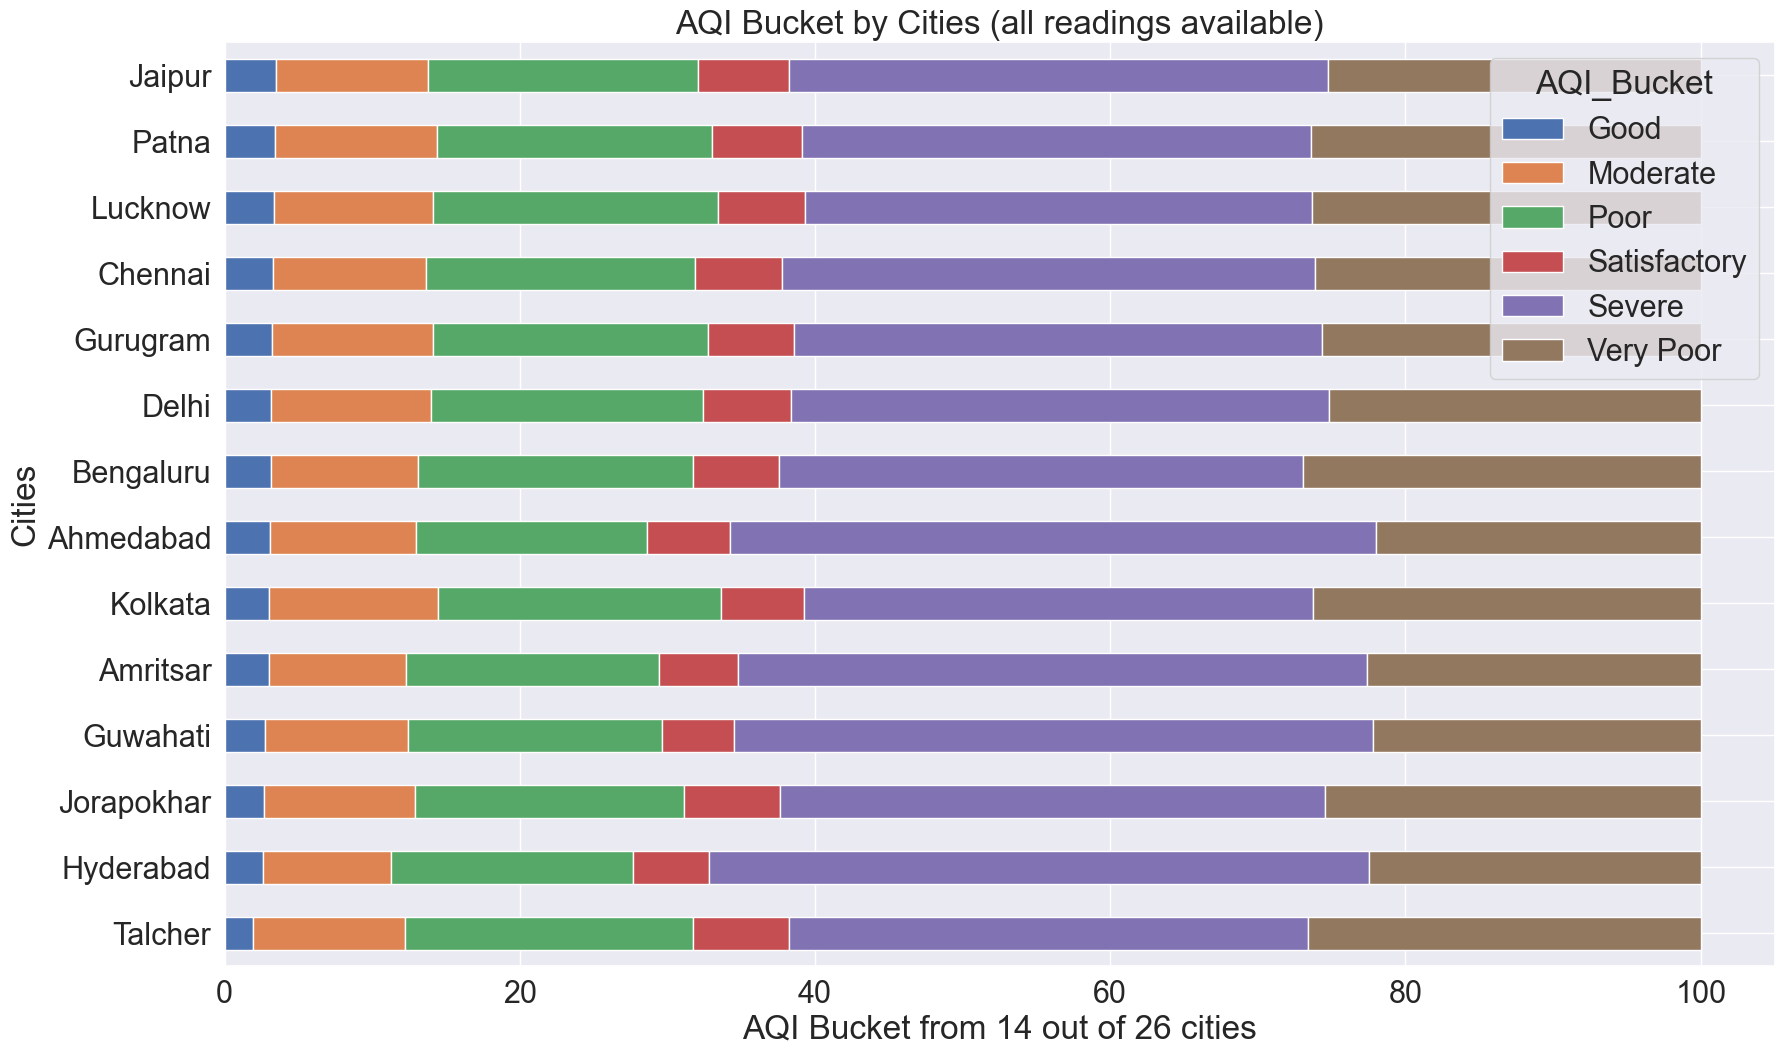

In [47]:
plot_chart(df_station_day_pivot_table[all_readings_available_filter], title='AQI Bucket by Cities (all readings available)', 
           xlabel_title=f'AQI Bucket from ' \
                        f'{df_station_day_pivot_table[all_readings_available_filter].shape[0]} out of {df_station_day_pivot_table.shape[0]} cities', 
           ylabel_title='Cities', 
           stacked=True, height=12.0)

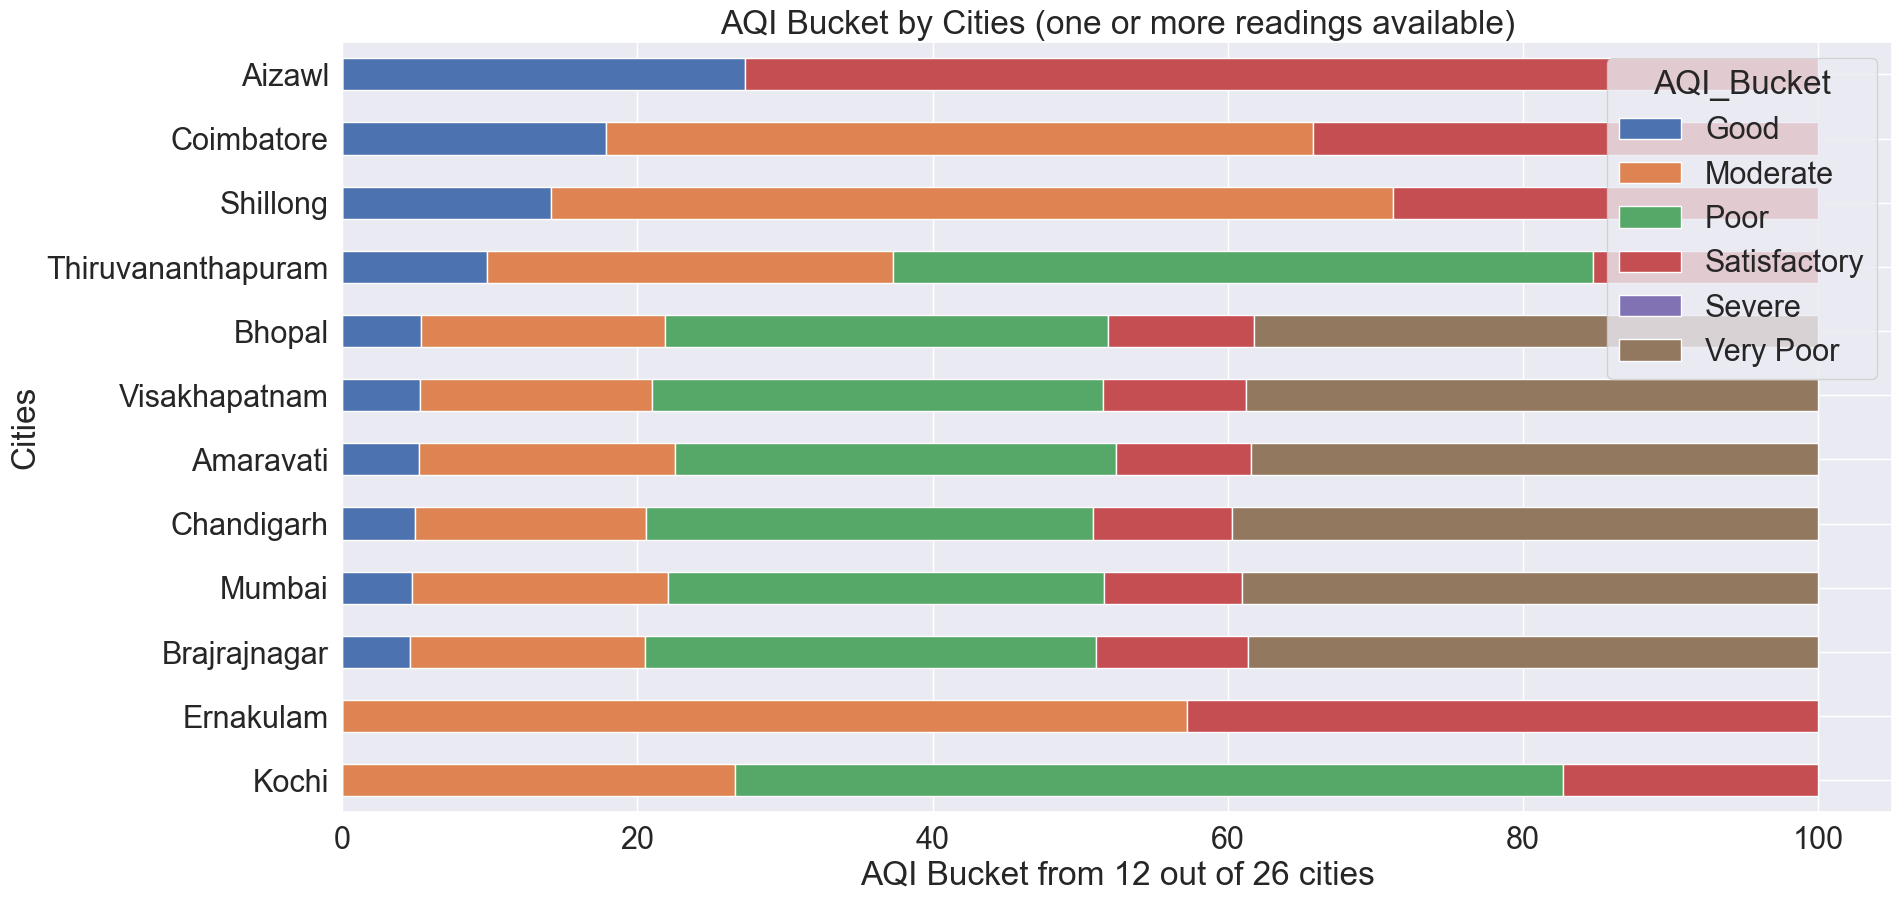

In [48]:
one_or_more_readings_filter = ~all_readings_available_filter
plot_chart(df_station_day_pivot_table[one_or_more_readings_filter], title='AQI Bucket by Cities (one or more readings available)', 
           xlabel_title=f'AQI Bucket from ' \
                        f'{df_station_day_pivot_table[one_or_more_readings_filter].shape[0]} out of {df_station_day_pivot_table.shape[0]} cities', 
           ylabel_title='Cities', 
           stacked=True, height=10.0)

In [49]:
df_station_day_pivot_table = df_station_day.sort_values(by=['AQI', 'AQ_Acceptability'], ascending=False) \
                                .pivot_table(values='AQI', index='City', columns='AQ_Acceptability', aggfunc=np.mean)
df_station_day_pivot_table = calculate_percentage(df_station_day_pivot_table)
df_station_day_pivot_table = df_station_day_pivot_table.sort_values(by='Acceptable')

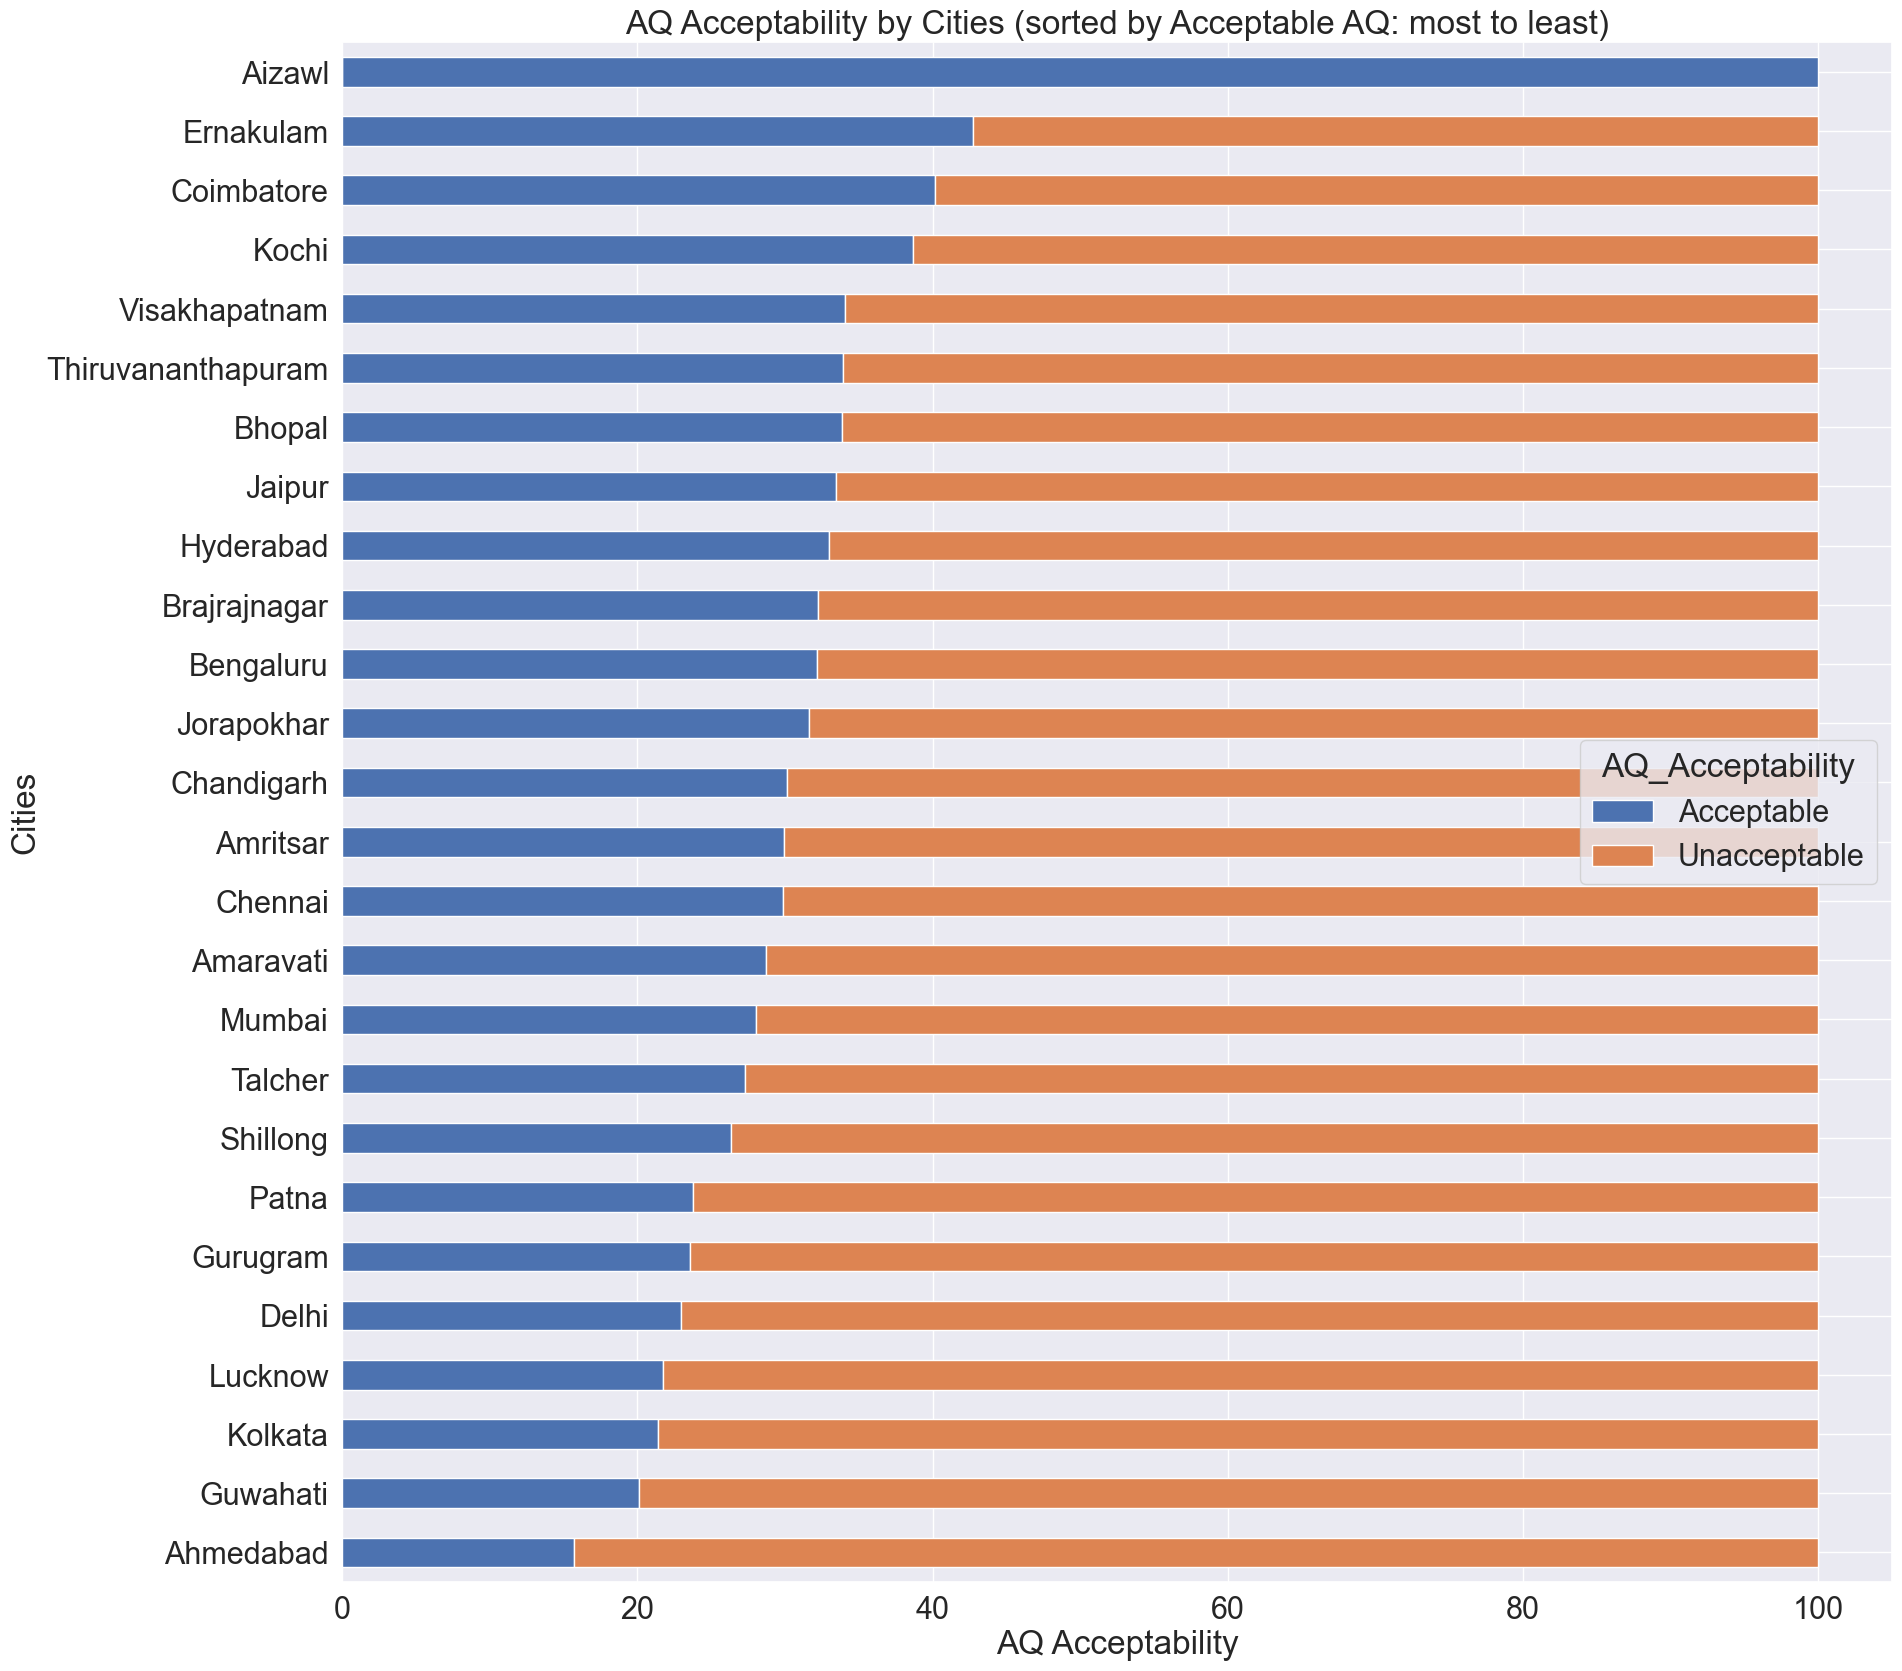

In [50]:
plot_chart(df_station_day_pivot_table, 
           title='AQ Acceptability by Cities (sorted by Acceptable AQ: most to least)', 
           xlabel_title='AQ Acceptability',  ylabel_title='Cities', 
           stacked=True, height=20.0)

In [51]:
df_city_day_pivot_table = df_city_day.sort_values(by=['AQI', 'AQ_Acceptability'], ascending=False) \
                                .pivot_table(values='AQI', index='City', columns='AQ_Acceptability', aggfunc=np.mean)
df_city_day_pivot_table = df_city_day_pivot_table.dropna()
df_city_day_pivot_table = calculate_percentage(df_city_day_pivot_table)
df_city_day_pivot_table = df_city_day_pivot_table.sort_values(by='Unacceptable')

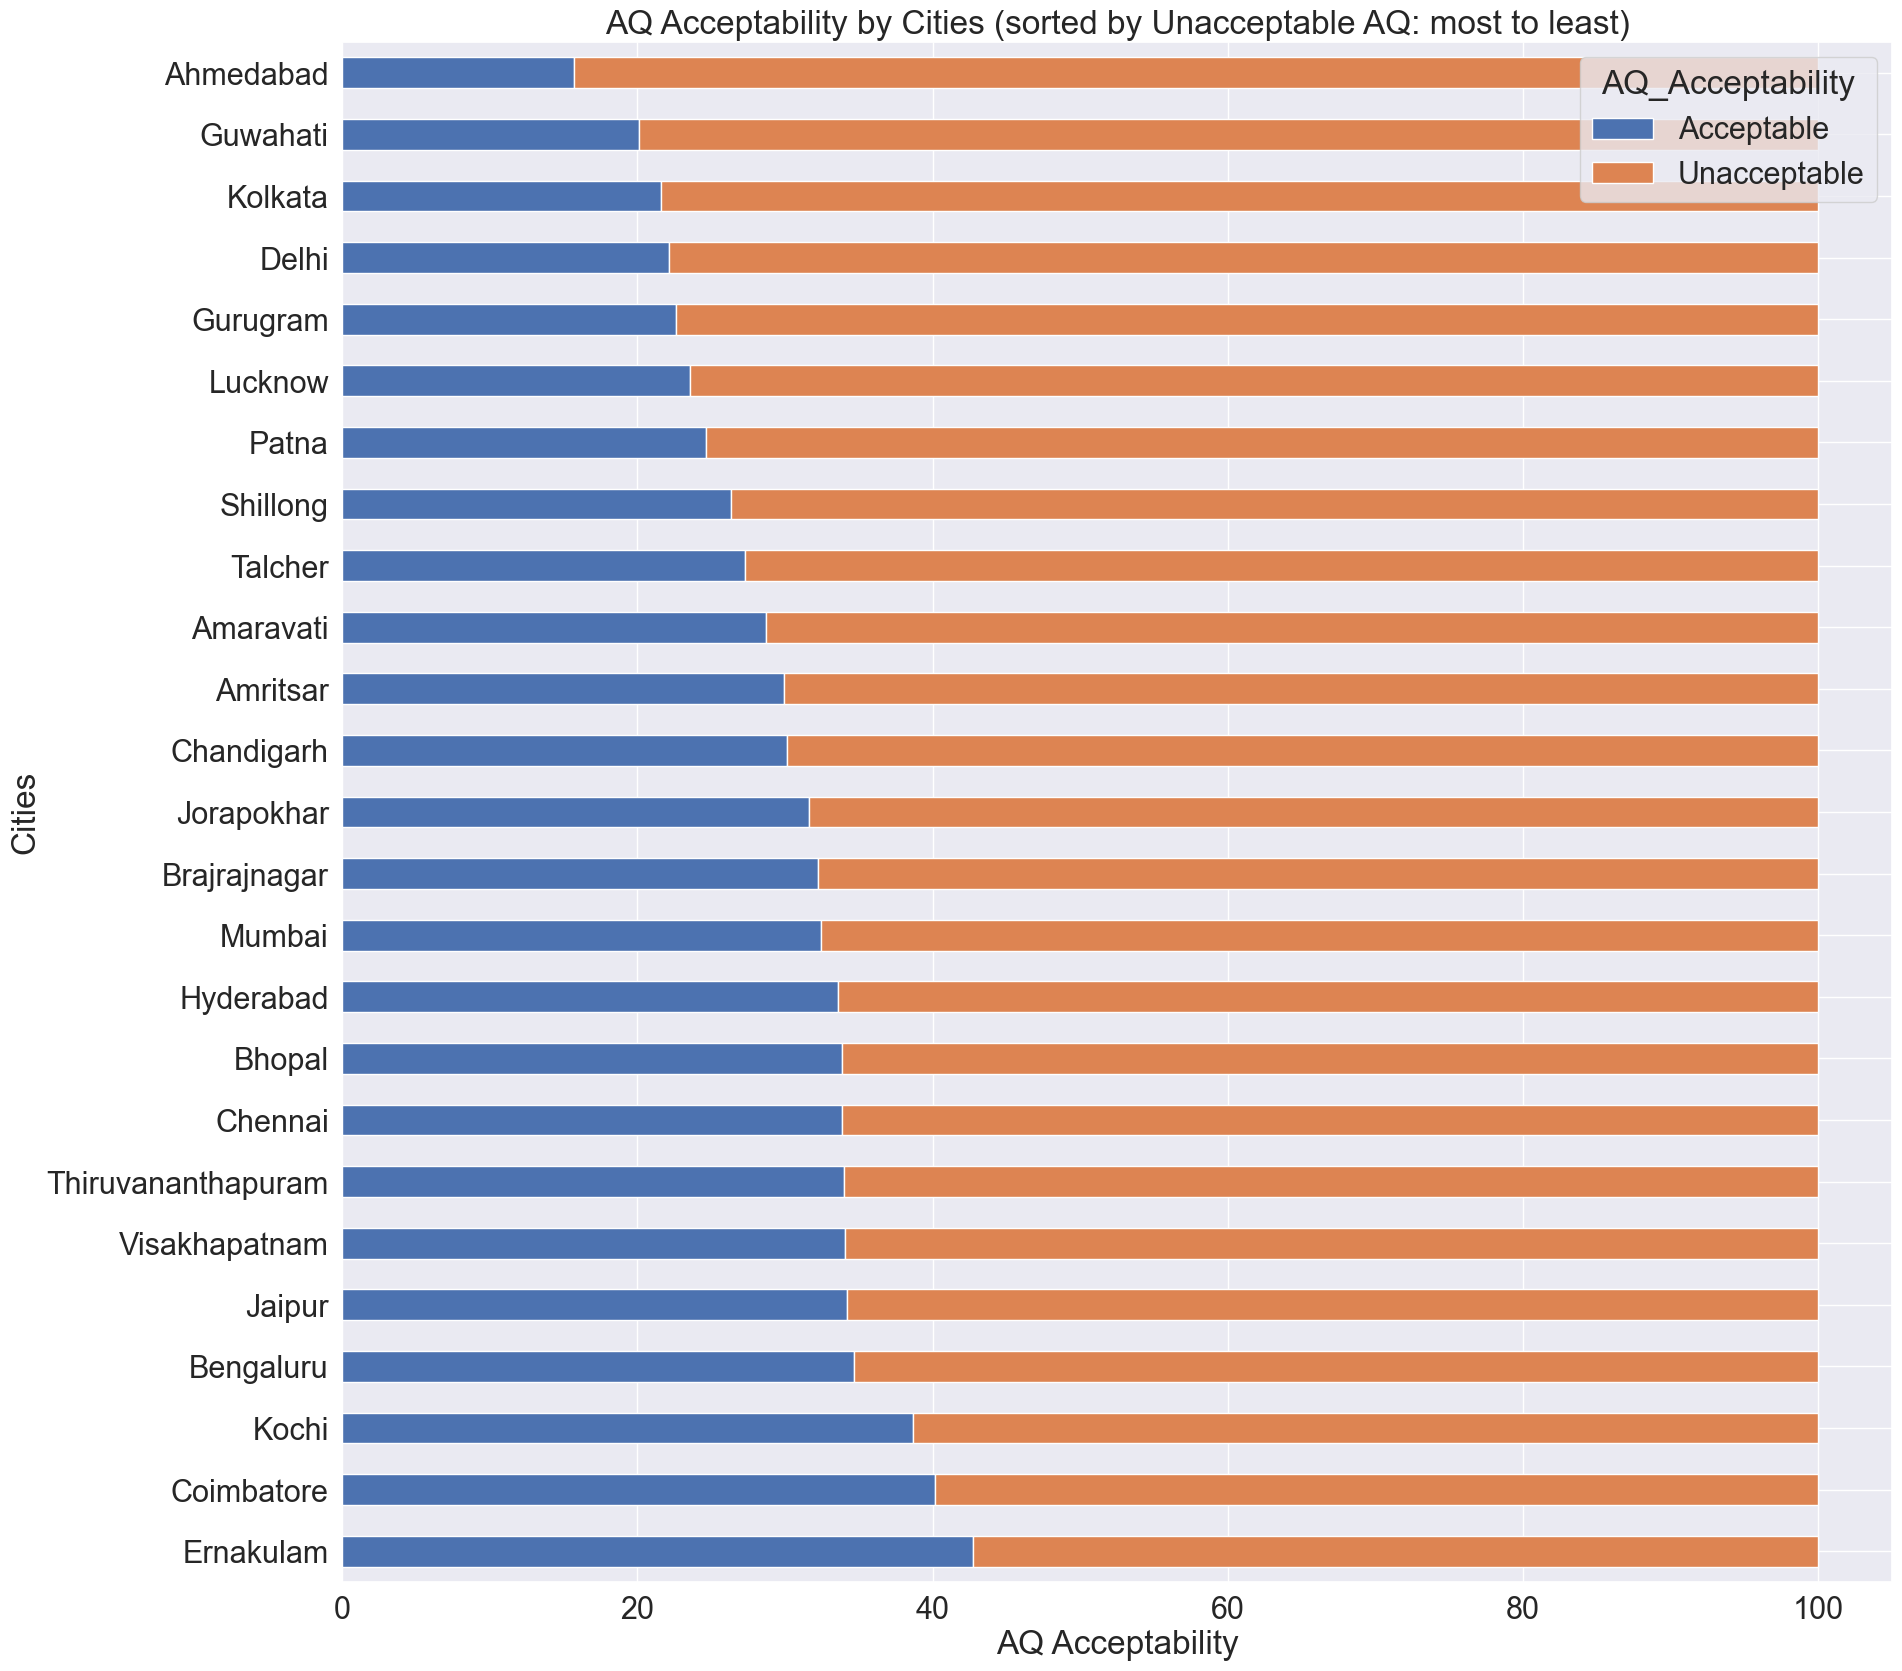

In [52]:
plot_chart(df_city_day_pivot_table, 
           title='AQ Acceptability by Cities (sorted by Unacceptable AQ: most to least)', 
           xlabel_title='AQ Acceptability', ylabel_title='Cities', 
           stacked=True, height=20.0)

In [3]:
df_city_day.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,StationName,State,Status,Region,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability
0,0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,...,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,5. Western,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
1,1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,...,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,5. Western,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable
2,2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,...,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,5. Western,01. Jan,2015,1. Winter,Weekend,Regular day,Unacceptable
3,3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,...,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,5. Western,01. Jan,2015,1. Winter,Weekend,Regular day,Unacceptable
4,4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,...,"Maninagar, Ahmedabad - GPCB",Gujarat,Active,5. Western,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable


In [4]:
df_city_day['AQ_Acceptability'].value_counts()

AQ_Acceptability
Unacceptable    141058
Acceptable       45612
Name: count, dtype: int64

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# Step 1: Data Preprocessing

# Load the dataset
df = pd.read_csv('city_day_transformed.csv')

# Handle missing values
df = df.dropna()

# Split the dataset into features and target variable
X = df[['PM10']]
y = df['AQ_Acceptability']
# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Data Cleaning (if necessary)
# Perform outlier removal or feature scaling if required

# Step 3: Exploratory Data Analysis (EDA)
# Perform statistical analysis and visualize the data

# Step 4: Model Training and Evaluation

# Select a machine learning algorithm
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Model Deployment
# Save the trained model for future use
joblib.dump(model, 'aqi_model.pkl')


Accuracy: 0.9860430821088113


['aqi_model.pkl']

In [6]:
df.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,StationName,State,Status,Region,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability
2123,2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,...,"Secretariat, Amaravati - APPCB",Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekend,Regular day,Unacceptable
2124,2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,...,"Secretariat, Amaravati - APPCB",Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekend,Regular day,Unacceptable
2125,2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,...,"Secretariat, Amaravati - APPCB",Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable
2126,2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,...,"Secretariat, Amaravati - APPCB",Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable
2127,2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,...,"Secretariat, Amaravati - APPCB",Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable


In [2]:
df[['PM10', 'AQ_Acceptability']]


,PM10,AQ_Acceptability
2123,124.50,Unacceptable
2124,129.06,Unacceptable
2125,135.32,Unacceptable
2126,104.09,Unacceptable
2127,114.84,Unacceptable
...,...,...
186664,32.27,Acceptable
186665,50.94,Acceptable
186666,74.09,Acceptable
186667,65.73,Acceptable


In [5]:
model.predict([[148]])

c:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [10]:
X_train

,CO,SO2,NH3,Benzene
107009,0.53,11.04,27.40,1.11
137905,0.51,3.24,11.31,16.35
107710,0.93,17.38,28.76,2.04
83156,0.98,11.60,57.11,2.31
125330,0.59,7.72,12.35,0.89
...,...,...,...,...
185854,0.31,2.33,6.97,2.30
100766,2.18,13.31,36.03,6.40
3728,0.02,6.34,7.94,6.22
78403,0.99,12.70,38.32,1.39


In [11]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [16]:
data = [[.18,1.31,0.03,0.40]]
prediction = model.predict(data)
prediction

c:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

[Text(0.6254441898918174, 0.9827586206896551, 'x[0] <= 0.745\ngini = 0.304\nsamples = 50632\nvalue = [9483, 41149]'),
 Text(0.3601896350435005, 0.9482758620689655, 'x[2] <= 15.315\ngini = 0.484\nsamples = 11071\nvalue = [6524, 4547]'),
 Text(0.16941810069089047, 0.9137931034482759, 'x[0] <= 0.545\ngini = 0.377\nsamples = 5659\nvalue = [4232, 1427]'),
 Text(0.0838606526498351, 0.8793103448275862, 'x[1] <= 7.92\ngini = 0.247\nsamples = 3817\nvalue = [3267, 550]'),
 Text(0.04628948453315137, 0.8448275862068966, 'x[0] <= 0.125\ngini = 0.174\nsamples = 3016\nvalue = [2725, 291]'),
 Text(0.01546684862959172, 0.8103448275862069, 'x[2] <= 8.405\ngini = 0.456\nsamples = 316\nvalue = [205, 111]'),
 Text(0.006368702376890708, 0.7758620689655172, 'x[0] <= 0.025\ngini = 0.164\nsamples = 122\nvalue = [111, 11]'),
 Text(0.005458887751620608, 0.7413793103448276, 'x[0] <= 0.005\ngini = 0.405\nsamples = 39\nvalue = [28, 11]'),
 Text(0.003639258501080405, 0.7068965517241379, 'x[1] <= 6.59\ngini = 0.185\n

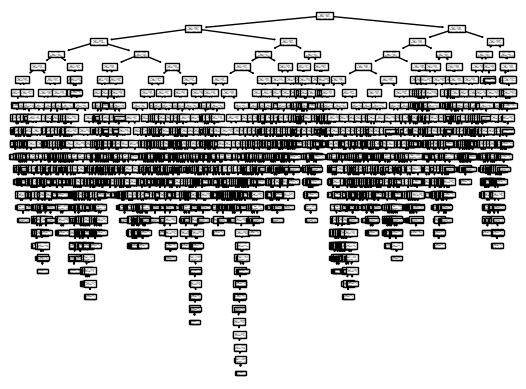

In [2]:
from sklearn.tree import plot_tree

plot_tree(model)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Step 1: Data Preprocessing

# Load the dataset
df = pd.read_csv('city_day_transformed.csv')

# Handle missing values
df = df.dropna()

# Split the dataset into features and target variable
X = df[['Benzene', 'SO2', 'NH3','NO2','CO']]
y = df['AQ_Acceptability']

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Data Cleaning (if necessary)
# Perform outlier removal or feature scaling if required

# Step 3: Exploratory Data Analysis (EDA)
# Perform statistical analysis and visualize the data

# Step 4: Model Training and Evaluation

# Select a different machine learning algorithm (Random Forest Classifier)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_train)

# Evaluate the model's performance
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

# Step 5: Model Deployment
# Save the trained model for future use
joblib.dump(model, 'aqi_model_rf.pkl')


Accuracy: 1.0


['aqi_model_rf.pkl']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63290 entries, 2123 to 186668
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              63290 non-null  int64  
 1   City                    63290 non-null  object 
 2   Date                    63290 non-null  object 
 3   PM2.5                   63290 non-null  float64
 4   PM10                    63290 non-null  float64
 5   NO                      63290 non-null  float64
 6   NO2                     63290 non-null  float64
 7   NOx                     63290 non-null  float64
 8   NH3                     63290 non-null  float64
 9   CO                      63290 non-null  float64
 10  SO2                     63290 non-null  float64
 11  O3                      63290 non-null  float64
 12  Benzene                 63290 non-null  float64
 13  Toluene                 63290 non-null  float64
 14  Xylene                  63290 non-null 

In [61]:
df['CO'].head()

2123    0.12
2124    0.14
2125    0.11
2126    0.09
2127    0.16
Name: CO, dtype: float64

In [62]:
df['SO2'].head()

2123    15.24
2124    26.96
2125    33.59
2126    19.00
2127    10.55
Name: SO2, dtype: float64

In [63]:
df['NH3'].head()

2123    10.72
2124    10.28
2125    12.91
2126    11.42
2127    12.25
Name: NH3, dtype: float64

In [4]:
df['AQ_Acceptability'].head()

2123    Unacceptable
2124    Unacceptable
2125    Unacceptable
2126    Unacceptable
2127    Unacceptable
Name: AQ_Acceptability, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63290 entries, 2123 to 186668
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              63290 non-null  int64  
 1   City                    63290 non-null  object 
 2   Date                    63290 non-null  object 
 3   PM2.5                   63290 non-null  float64
 4   PM10                    63290 non-null  float64
 5   NO                      63290 non-null  float64
 6   NO2                     63290 non-null  float64
 7   NOx                     63290 non-null  float64
 8   NH3                     63290 non-null  float64
 9   CO                      63290 non-null  float64
 10  SO2                     63290 non-null  float64
 11  O3                      63290 non-null  float64
 12  Benzene                 63290 non-null  float64
 13  Toluene                 63290 non-null  float64
 14  Xylene                  63290 non-null 

In [12]:
X_test

,CO,SO2,NH3
77630,1.21,10.25,50.89
83415,0.78,10.64,32.08
87201,1.84,19.49,35.00
76692,1.82,22.27,63.31
126706,0.62,13.68,12.75
...,...,...,...
139981,0.32,6.14,12.63
72584,0.20,5.81,31.36
86365,1.13,12.70,31.58
93922,1.01,15.05,26.28


In [13]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [16]:
pred = model.predict([[1.21, 10.25, 50.89]])
pred

c:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
import pickle

pickle_model = open('aqi_model.pkl','rb')
model_p = pickle.load(pickle_model)

In [20]:
model_p = joblib.load('aqi_model.pkl')
model_p.predict([[1.21, 10.25, 50.89]])

c:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [1]:
df.info()

NameError: name 'df' is not defined